In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

In [3]:
warnings.filterwarnings(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - Intercement data

In [4]:
df = pd.read_csv("../../../data/raw/partner_ii/db3_cement.csv")

<IPython.core.display.Javascript object>

In [5]:
df = df[df["strength_28d"].notna()].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [6]:
df = df[df["unified_material_name"] == "Type IL"].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df.shape

(78, 29)

<IPython.core.display.Javascript object>

In [8]:
df.head()

,sample_date,sample_id_plant,unified_material_name,raw_material_code,cao,sio2,al2o3,fe2o3,mgo,so3,...,loi,water_demand,setting_initial,strength_1d,strength_3d,strength_7d,strength_28d,blaine,sieve_32um,sieve_45um
0,2020-05-11 10:00:00+00:00,1078041,Type IL,Daily Average Cement,62.54,18.17,4.18,2.93,2.95,3.15,...,6.17,27.0,125.0,14.84,26.46,31.72,41.36,458.0,4.21,97.75
1,2020-05-11 10:00:00+00:00,1078040,Type IL,Daily Average Cement,62.52,18.30,4.20,2.96,3.01,3.14,...,6.13,27.0,135.0,17.26,27.50,31.96,42.06,473.0,3.81,97.89
2,2020-07-03 10:00:00+00:00,1087333,Type IL,Daily Average Cement,60.75,18.87,4.43,3.07,2.96,3.15,...,5.92,27.0,130.0,18.00,30.11,37.31,42.75,471.0,3.04,98.47
3,2020-08-21 10:00:00+00:00,1096129,Type IL,Daily Average Cement,62.21,18.12,4.41,3.11,2.81,3.09,...,6.02,27.0,125.0,17.26,28.04,34.04,41.57,468.0,4.27,97.92
4,2020-09-11 10:00:00+00:00,1099337,Type IL,Daily Average Cement,63.42,18.26,4.43,3.03,2.47,3.11,...,5.53,27.0,155.0,17.78,28.79,34.18,37.75,473.0,4.89,98.06


<IPython.core.display.Javascript object>

In [9]:
df.tail()

,sample_date,sample_id_plant,unified_material_name,raw_material_code,cao,sio2,al2o3,fe2o3,mgo,so3,...,loi,water_demand,setting_initial,strength_1d,strength_3d,strength_7d,strength_28d,blaine,sieve_32um,sieve_45um
73,2021-12-22 11:00:00+00:00,1180141,Type IL,Daily Average Cement,62.20,18.02,4.26,3.09,2.03,3.10,...,5.97,26.5,165.0,15.21,28.99,32.08,36.92,445.0,2.95,98.57
74,2021-12-23 11:00:00+00:00,1180318,Type IL,Daily Average Cement,62.35,18.10,4.22,3.09,2.02,3.09,...,5.81,26.5,165.0,14.76,27.33,31.51,37.65,442.0,2.74,98.35
75,2021-12-29 11:00:00+00:00,1181312,Type IL,Daily Average Cement,62.24,18.11,4.19,3.03,2.26,3.13,...,5.56,26.5,165.0,14.90,20.88,33.56,39.87,460.0,3.24,98.43
76,2021-12-30 11:00:00+00:00,1181395,Type IL,Daily Average Cement,62.23,18.10,4.21,3.03,2.26,3.08,...,5.60,26.5,170.0,13.60,29.02,32.89,36.74,434.0,3.31,98.17
77,2021-12-31 11:00:00+00:00,1181620,Type IL,Daily Average Cement,62.27,18.02,4.15,2.99,2.33,3.12,...,5.73,27.0,165.0,14.92,25.06,28.36,36.36,434.0,3.16,99.15


<IPython.core.display.Javascript object>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sample_date            78 non-null     object 
 1   sample_id_plant        78 non-null     int64  
 2   unified_material_name  78 non-null     object 
 3   raw_material_code      78 non-null     object 
 4   cao                    77 non-null     float64
 5   sio2                   77 non-null     float64
 6   al2o3                  77 non-null     float64
 7   fe2o3                  77 non-null     float64
 8   mgo                    77 non-null     float64
 9   so3                    77 non-null     float64
 10  k2o                    77 non-null     float64
 11  na2o                   77 non-null     float64
 12  cl                     0 non-null      float64
 13  tio2                   0 non-null      float64
 14  alite                  75 non-null     float64
 15  belite  

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [11]:
df.dtypes.value_counts()

float64    25
object      3
int64       1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sample_id_plant,78.0,1.150035e+06,27205.144474,1078040.00,1.135324e+06,1158487.500,1.170224e+06,1181620.00
cao,77.0,6.224052e+01,0.590615,58.75,6.203000e+01,62.230,6.254000e+01,63.42
sio2,77.0,1.783506e+01,0.319805,16.79,1.762000e+01,17.870,1.808000e+01,18.87
al2o3,77.0,4.359740e+00,0.130525,3.97,4.300000e+00,4.380,4.430000e+00,4.64
fe2o3,77.0,3.079221e+00,0.190917,2.92,3.000000e+00,3.040,3.110000e+00,4.58
mgo,77.0,3.029610e+00,0.552560,2.02,2.710000e+00,2.960,3.470000e+00,3.95
so3,77.0,3.091688e+00,0.040827,2.93,3.070000e+00,3.090,3.110000e+00,3.18
k2o,77.0,6.072727e-01,0.044945,0.50,5.700000e-01,0.610,6.400000e-01,0.75
na2o,77.0,5.558442e-02,0.026680,0.00,4.000000e-02,0.060,7.000000e-02,0.13
cl,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [13]:
df.describe(exclude="number").T

,count,unique,top,freq
sample_date,78,77,2020-05-11 10:00:00+00:00,2
unified_material_name,78,1,Type IL,78
raw_material_code,78,1,Daily Average Cement,78


<IPython.core.display.Javascript object>

In [14]:
df["unified_material_name"].value_counts()

unified_material_name
Type IL    78
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
dates = df["sample_date"]

<IPython.core.display.Javascript object>

In [16]:
print(dates.min())
print(dates.max())

2020-05-11 10:00:00+00:00
2021-12-31 11:00:00+00:00


<IPython.core.display.Javascript object>

In [17]:
dates

0     2020-05-11 10:00:00+00:00
1     2020-05-11 10:00:00+00:00
2     2020-07-03 10:00:00+00:00
3     2020-08-21 10:00:00+00:00
4     2020-09-11 10:00:00+00:00
                ...            
73    2021-12-22 11:00:00+00:00
74    2021-12-23 11:00:00+00:00
75    2021-12-29 11:00:00+00:00
76    2021-12-30 11:00:00+00:00
77    2021-12-31 11:00:00+00:00
Name: sample_date, Length: 78, dtype: object

<IPython.core.display.Javascript object>

In [18]:
for column in df.dtypes[df.dtypes == object].keys():
    print(column, df[column].unique())


sample_date ['2020-05-11 10:00:00+00:00' '2020-07-03 10:00:00+00:00'
 '2020-08-21 10:00:00+00:00' '2020-09-11 10:00:00+00:00'
 '2020-09-25 10:00:00+00:00' '2020-10-09 10:00:00+00:00'
 '2020-10-23 10:00:00+00:00' '2020-11-06 11:00:00+00:00'
 '2020-11-20 11:00:00+00:00' '2020-12-04 11:00:00+00:00'
 '2020-12-19 11:00:00+00:00' '2020-12-25 11:00:00+00:00'
 '2021-01-14 11:00:00+00:00' '2021-01-22 11:00:00+00:00'
 '2021-01-30 11:00:00+00:00' '2021-02-20 11:00:00+00:00'
 '2021-03-07 11:00:00+00:00' '2021-04-02 10:00:00+00:00'
 '2021-04-17 10:00:00+00:00' '2021-04-24 10:00:00+00:00'
 '2021-05-01 10:00:00+00:00' '2021-05-10 10:00:00+00:00'
 '2021-05-20 10:00:00+00:00' '2021-05-22 10:00:00+00:00'
 '2021-05-28 10:00:00+00:00' '2021-06-05 10:00:00+00:00'
 '2021-06-12 10:00:00+00:00' '2021-06-19 10:00:00+00:00'
 '2021-06-26 10:00:00+00:00' '2021-07-02 10:00:00+00:00'
 '2021-07-09 10:00:00+00:00' '2021-07-16 10:00:00+00:00'
 '2021-08-05 10:00:00+00:00' '2021-08-06 10:00:00+00:00'
 '2021-08-12 10:00:

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

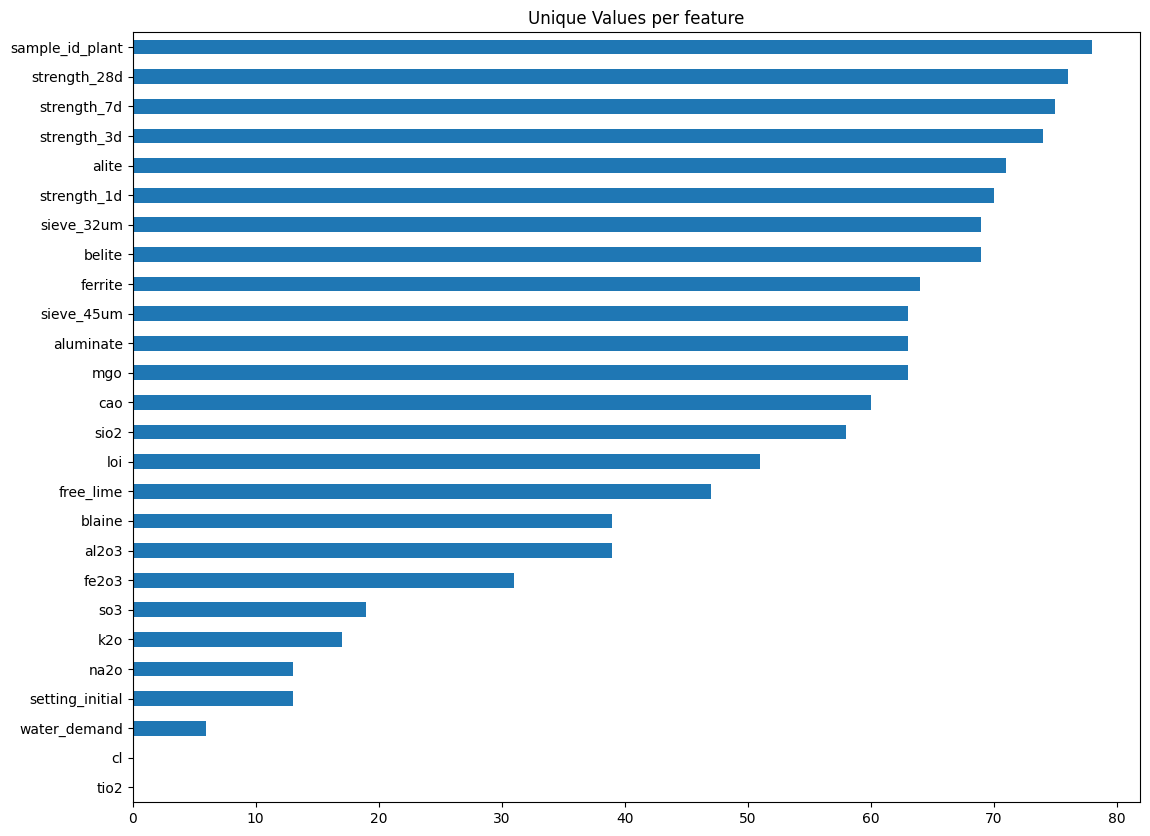

<IPython.core.display.Javascript object>

In [19]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2]),
 [Text(0, 0, 'unified_material_name'),
  Text(1, 0, 'raw_material_code'),
  Text(2, 0, 'sample_date')])

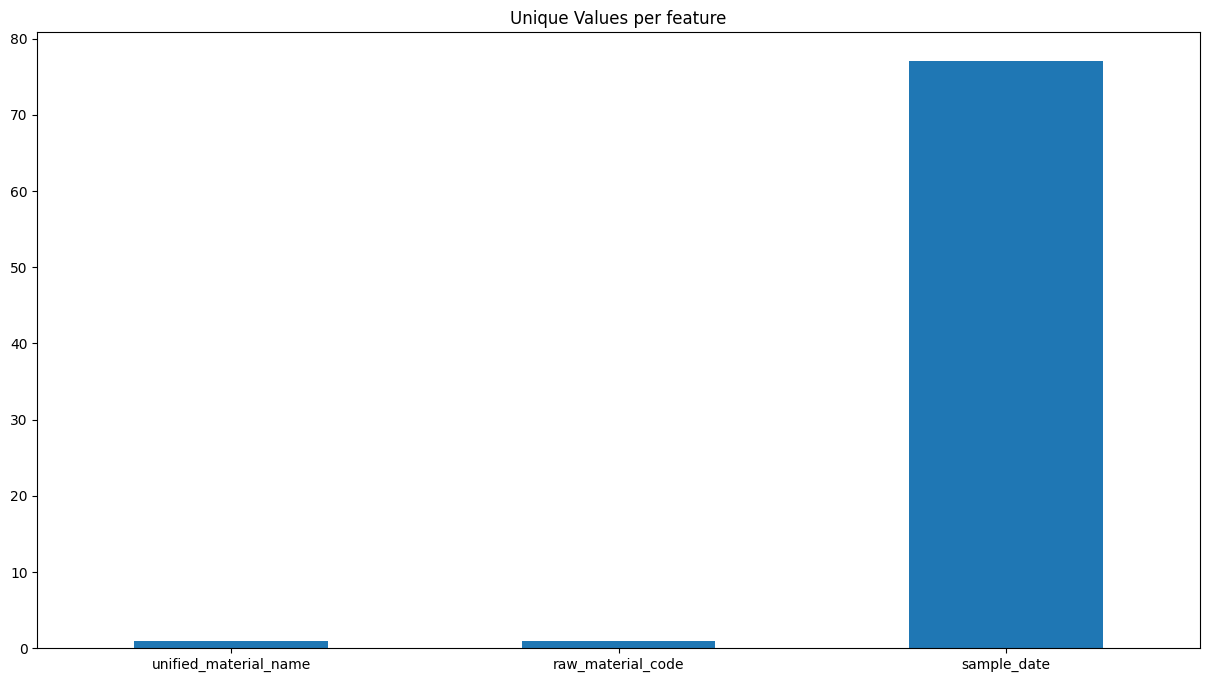

<IPython.core.display.Javascript object>

In [20]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [21]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 15 variables with missing values from a total of 29


<IPython.core.display.Javascript object>

In [22]:
df.isna().any().sort_values()

sample_date              False
blaine                   False
strength_28d             False
strength_7d              False
strength_3d              False
strength_1d              False
setting_initial          False
water_demand             False
loi                      False
sieve_32um               False
sieve_45um               False
sample_id_plant          False
unified_material_name    False
raw_material_code        False
na2o                      True
cao                       True
sio2                      True
al2o3                     True
fe2o3                     True
mgo                       True
free_lime                 True
ferrite                   True
aluminate                 True
belite                    True
so3                       True
tio2                      True
cl                        True
k2o                       True
alite                     True
dtype: bool

<IPython.core.display.Javascript object>

In [23]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

,Missing (count)
tio2,78
cl,78
alite,3
free_lime,3
ferrite,3
aluminate,3
belite,3
so3,1
na2o,1
k2o,1


<IPython.core.display.Javascript object>

In [24]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  179 missing values.


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count of quantity of missing values')

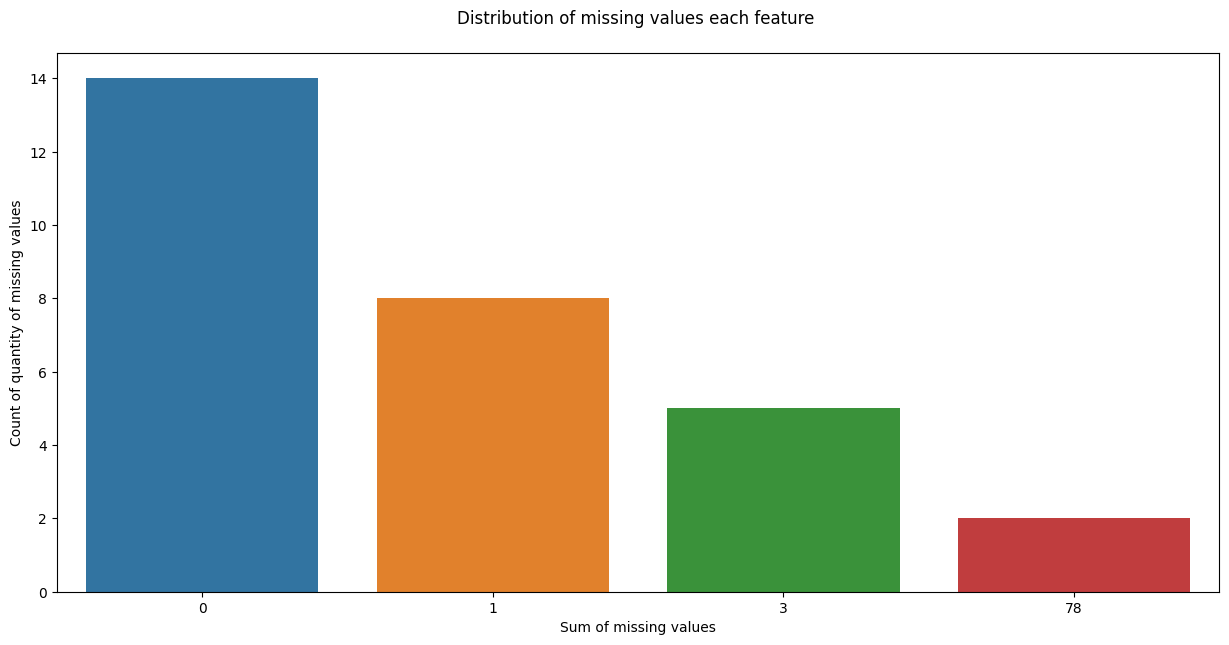

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df.isna().sum(), x=df.isna().sum().index)
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 29 artists>

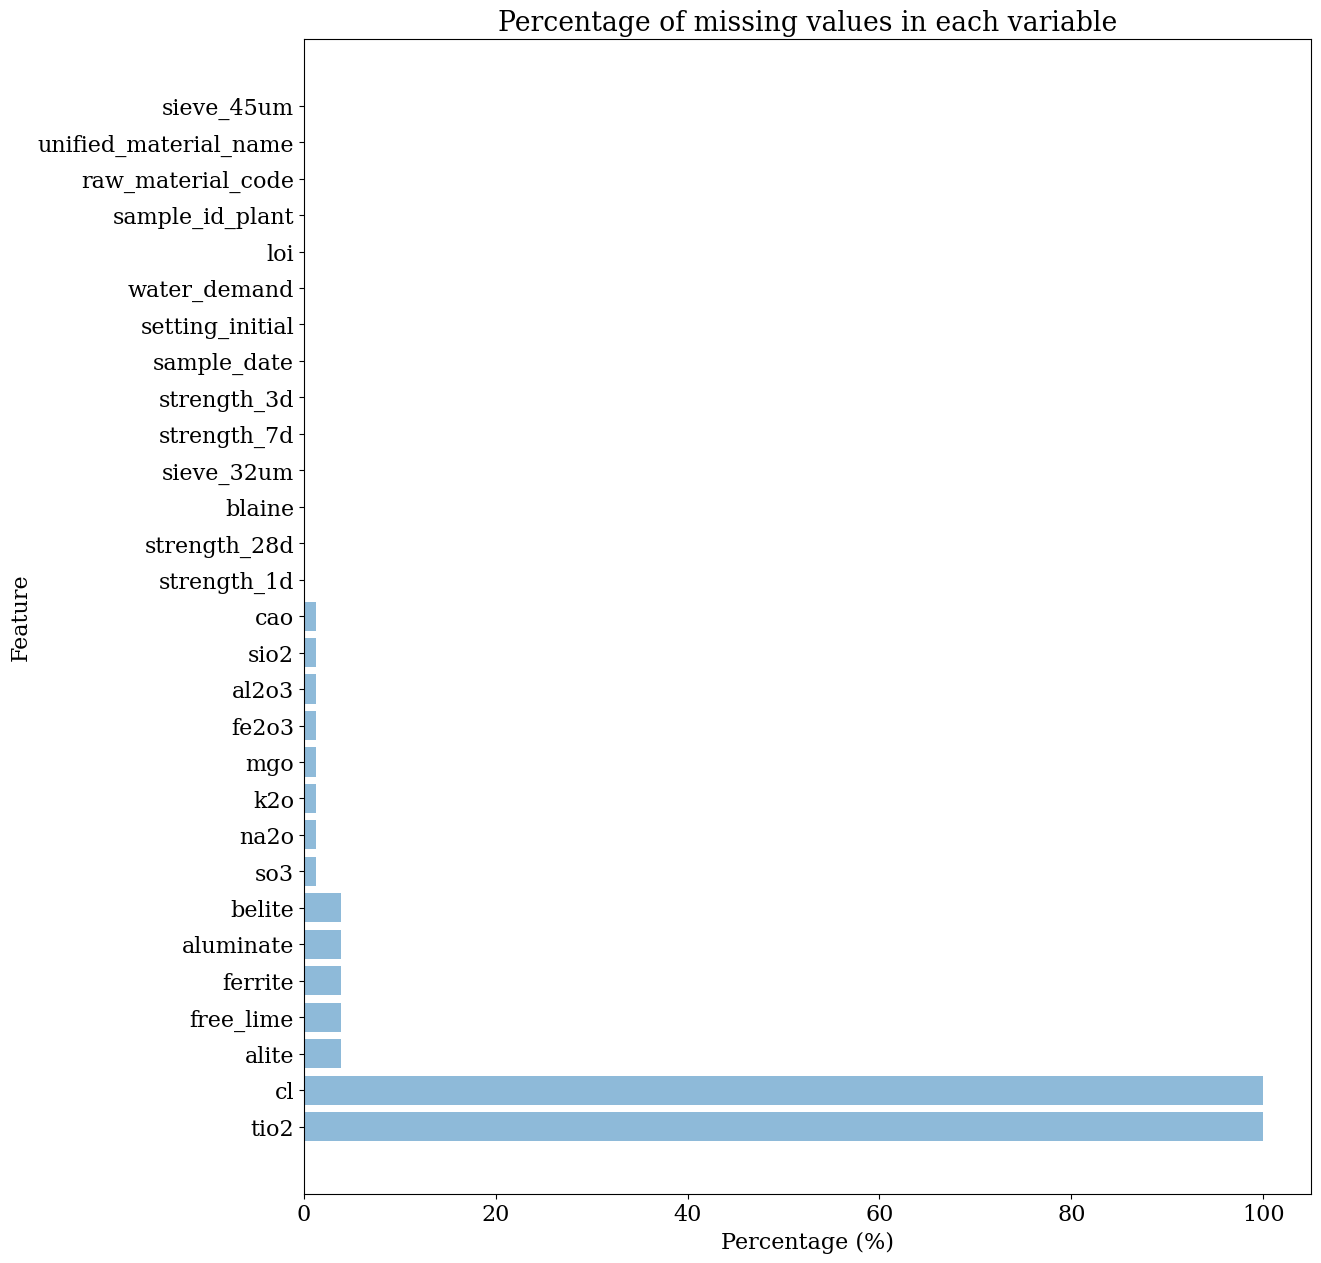

<IPython.core.display.Javascript object>

In [26]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [27]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
tio2,100.000000
cl,100.000000
alite,3.846154
free_lime,3.846154
ferrite,3.846154
aluminate,3.846154
belite,3.846154
so3,1.282051
na2o,1.282051
k2o,1.282051


<IPython.core.display.Javascript object>

In [28]:
df["strength_28d"].notna().sum()

78

<IPython.core.display.Javascript object>

<BarContainer object of 29 artists>

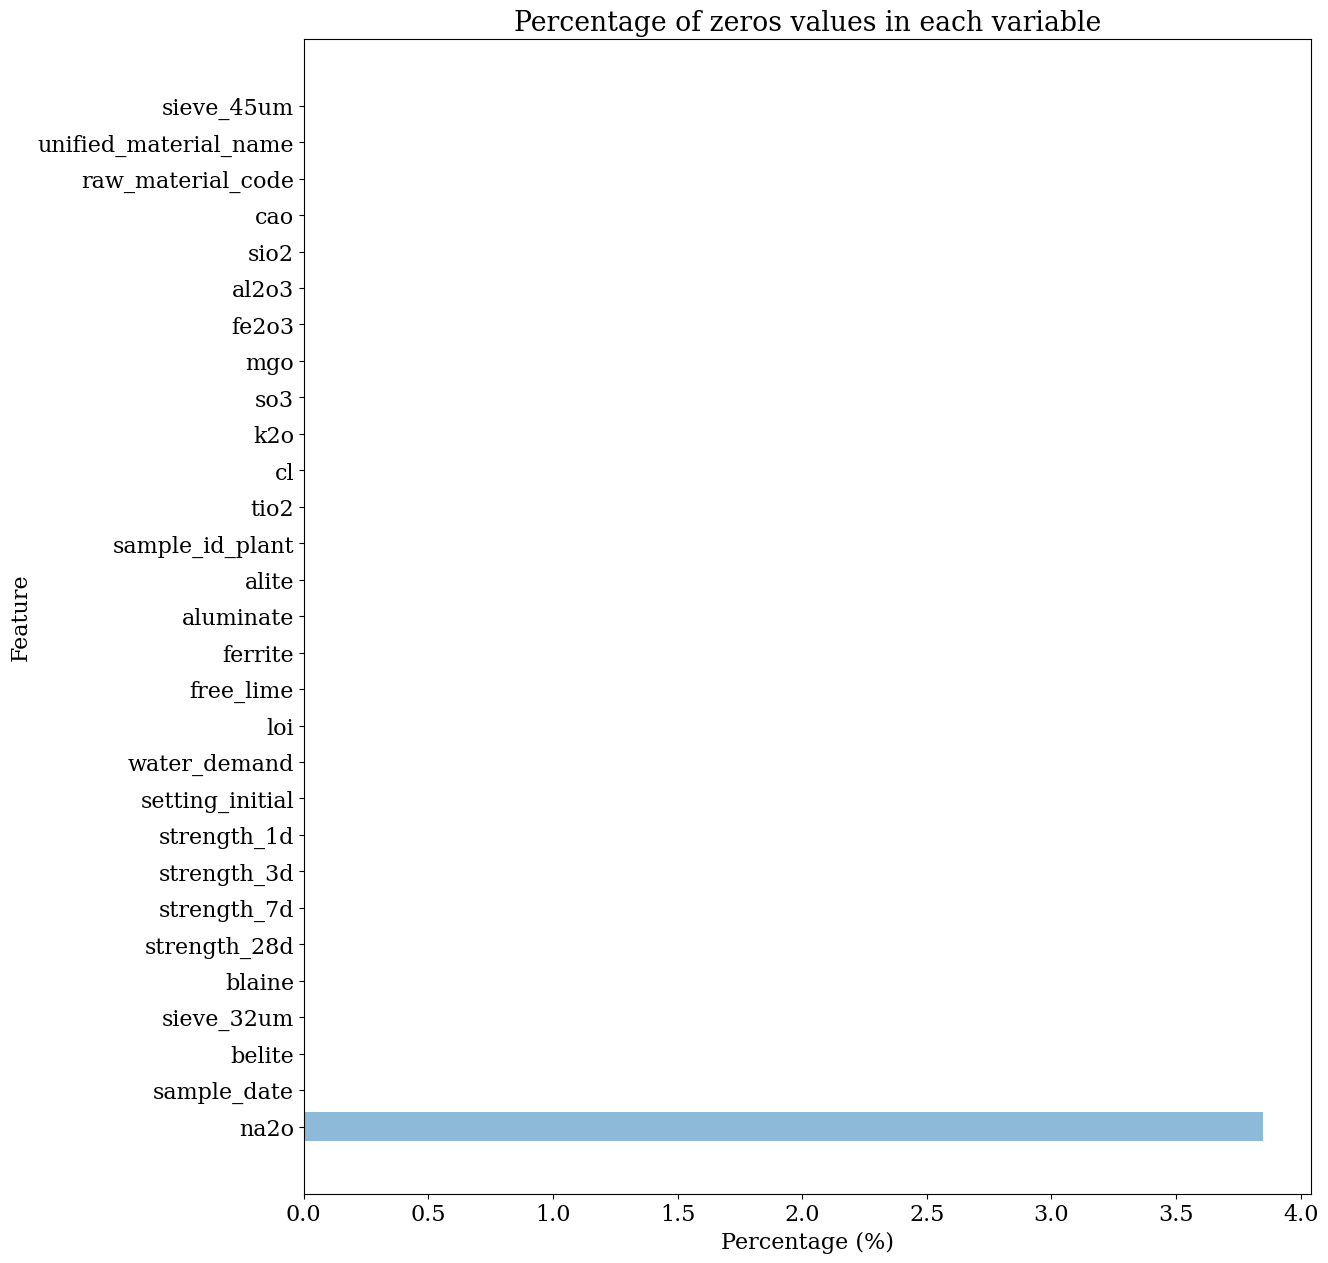

<IPython.core.display.Javascript object>

In [29]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [30]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

In [31]:
n_duplicates = df.drop(["sample_date"], axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

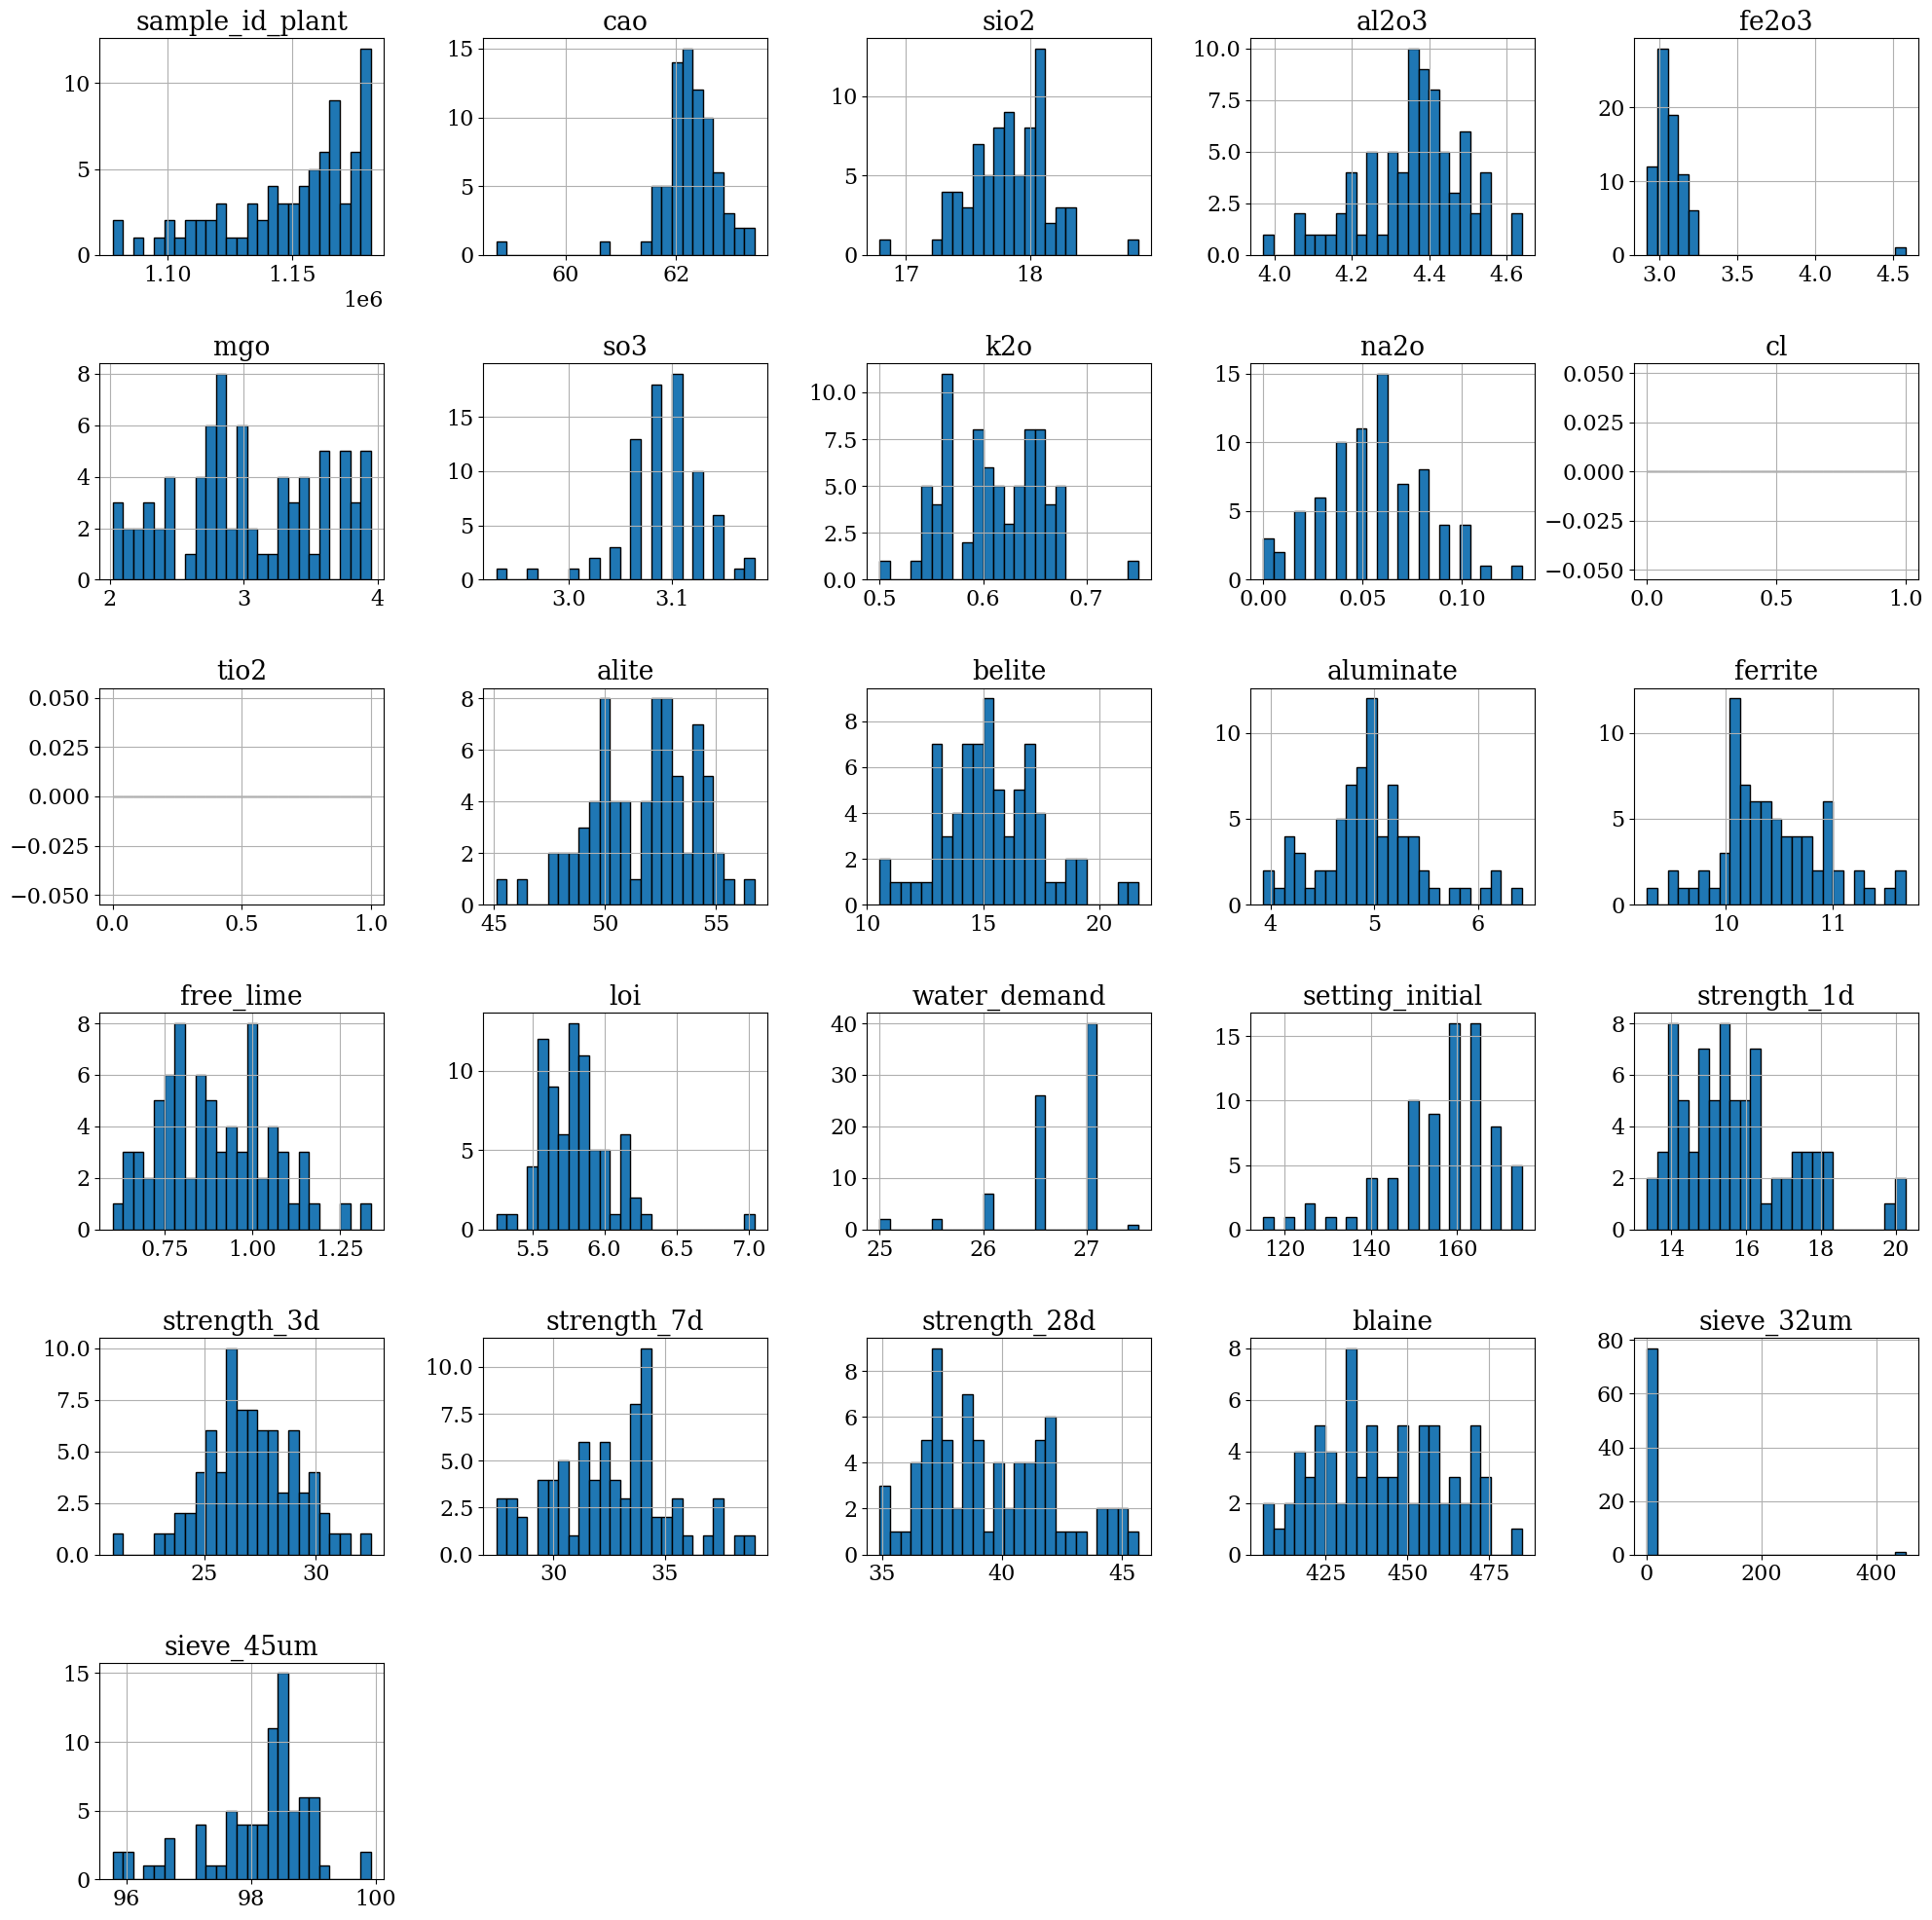

<IPython.core.display.Javascript object>

In [32]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

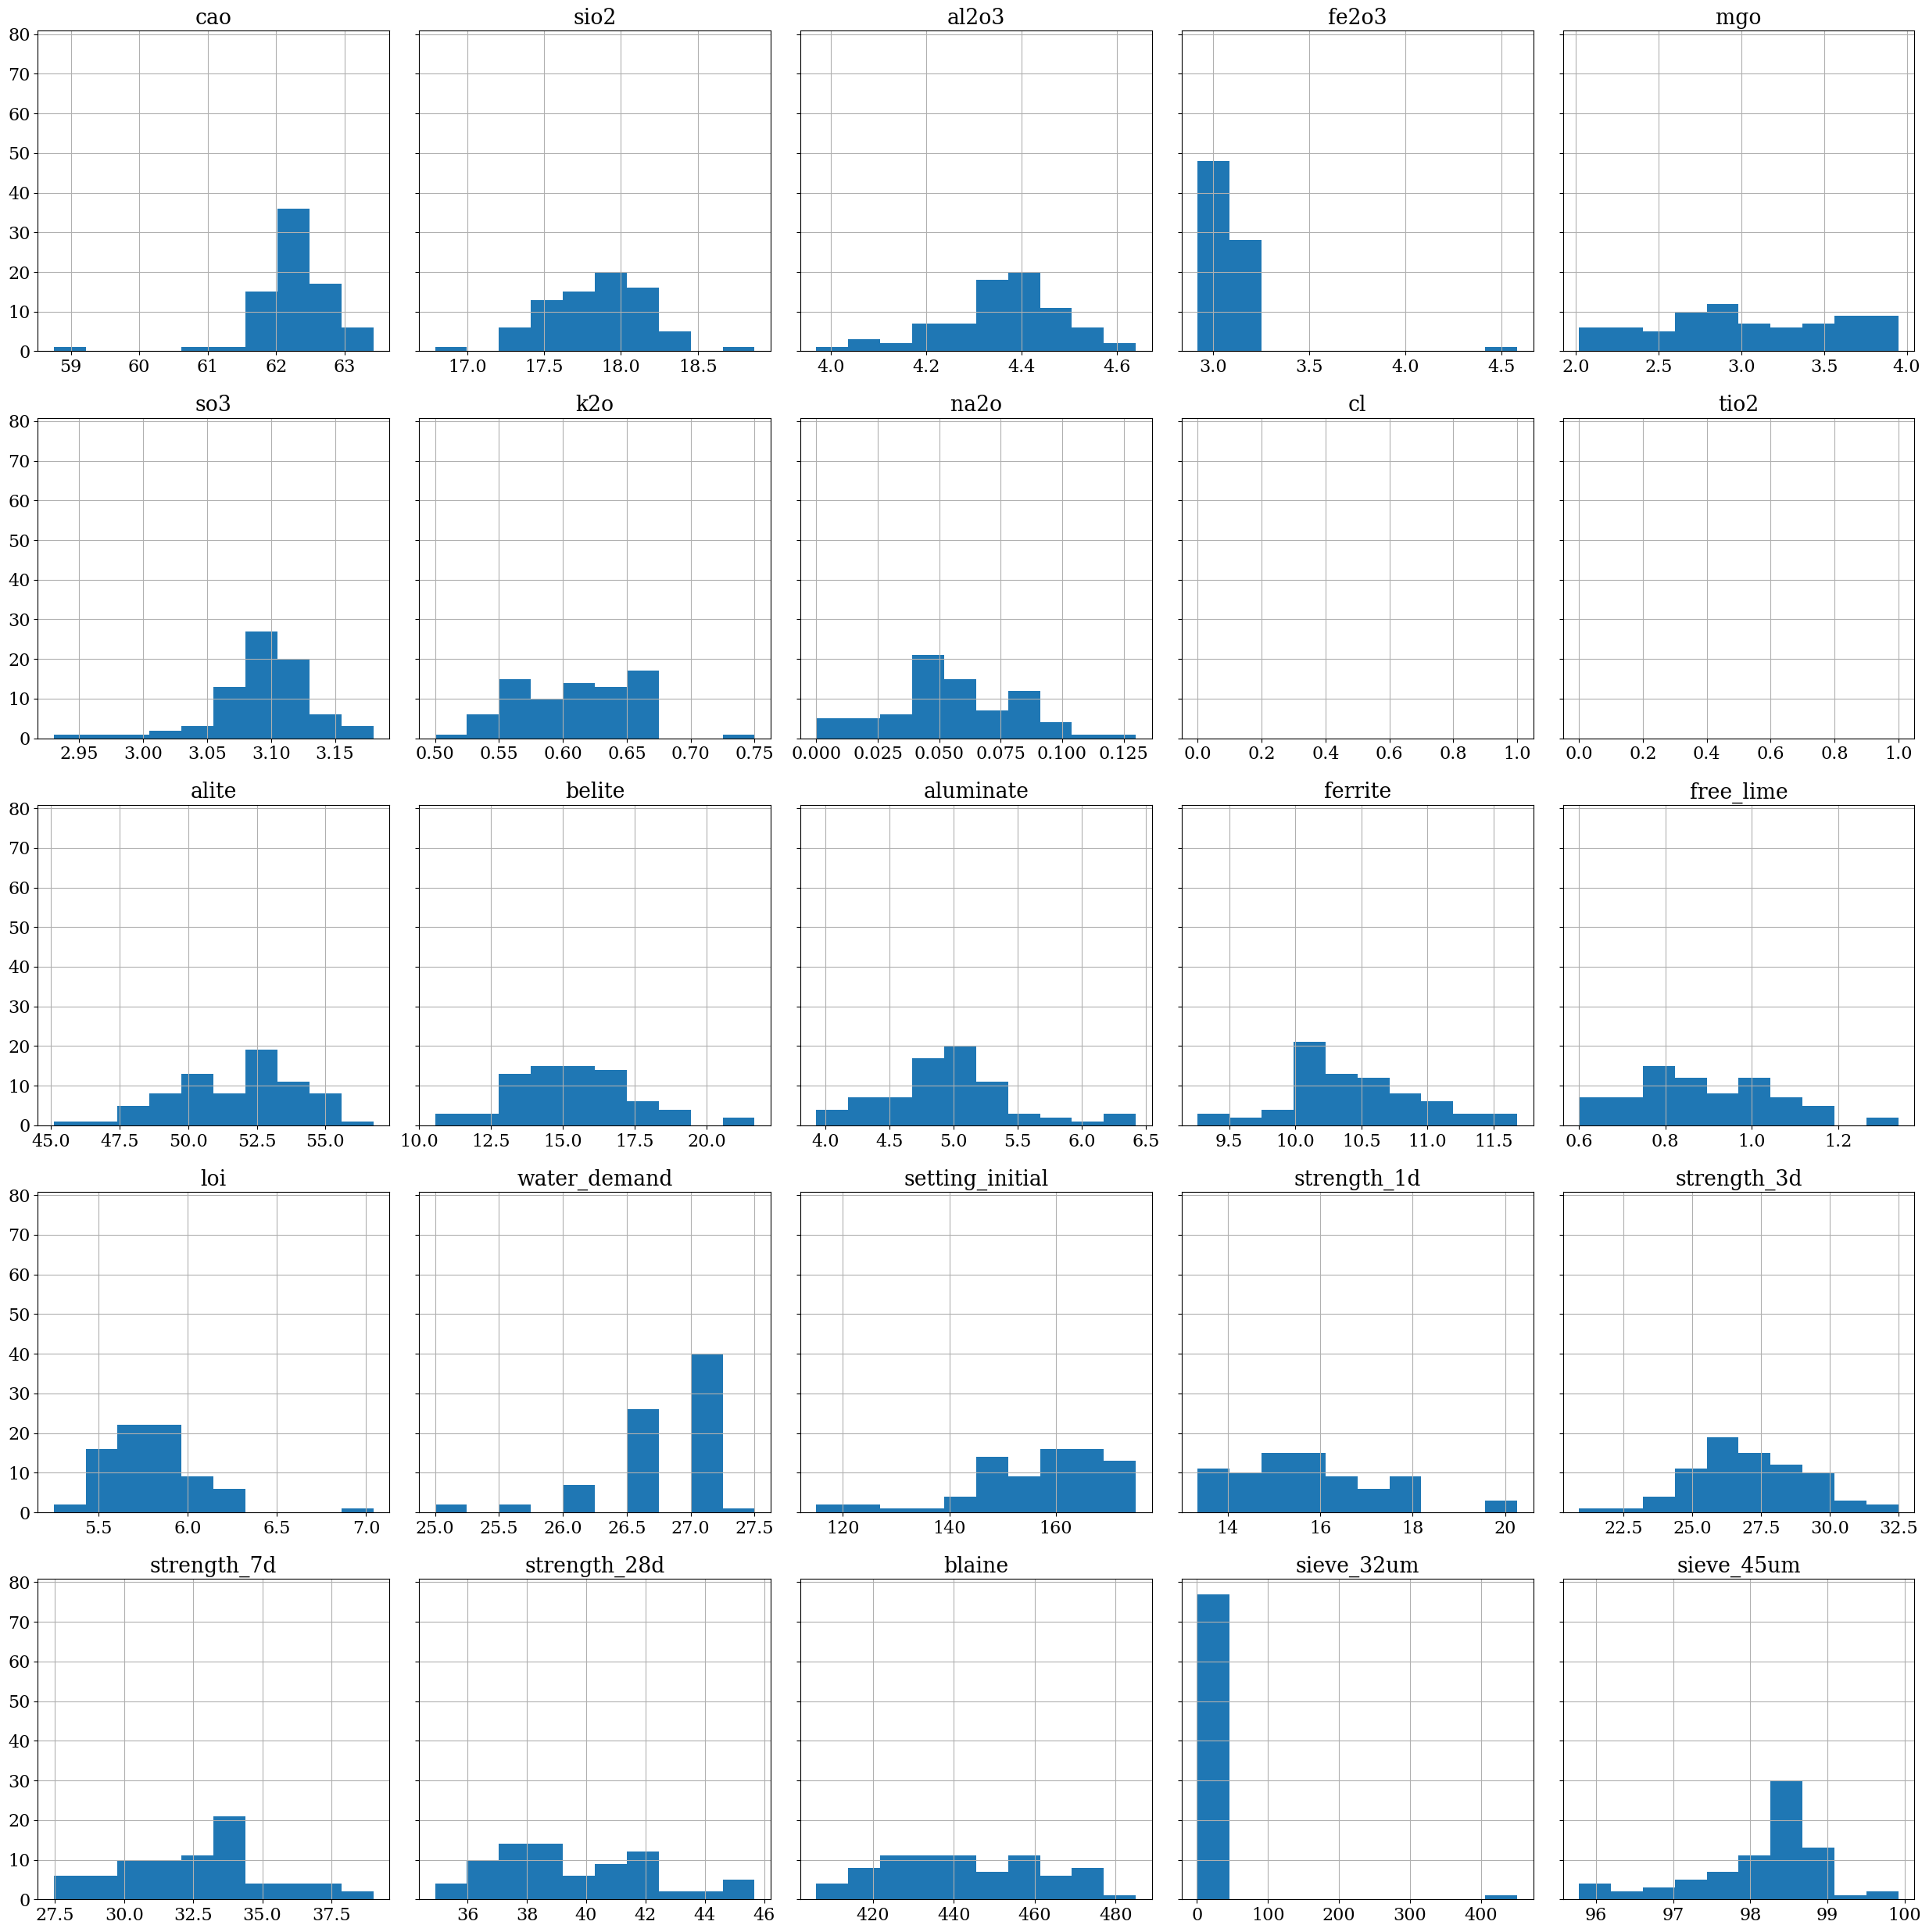

<IPython.core.display.Javascript object>

In [33]:
df.select_dtypes(include="float64").hist(figsize=(25, 25), sharey=True)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

/tmp/ipykernel_94419/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94419/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94419/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94419/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94419/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=T

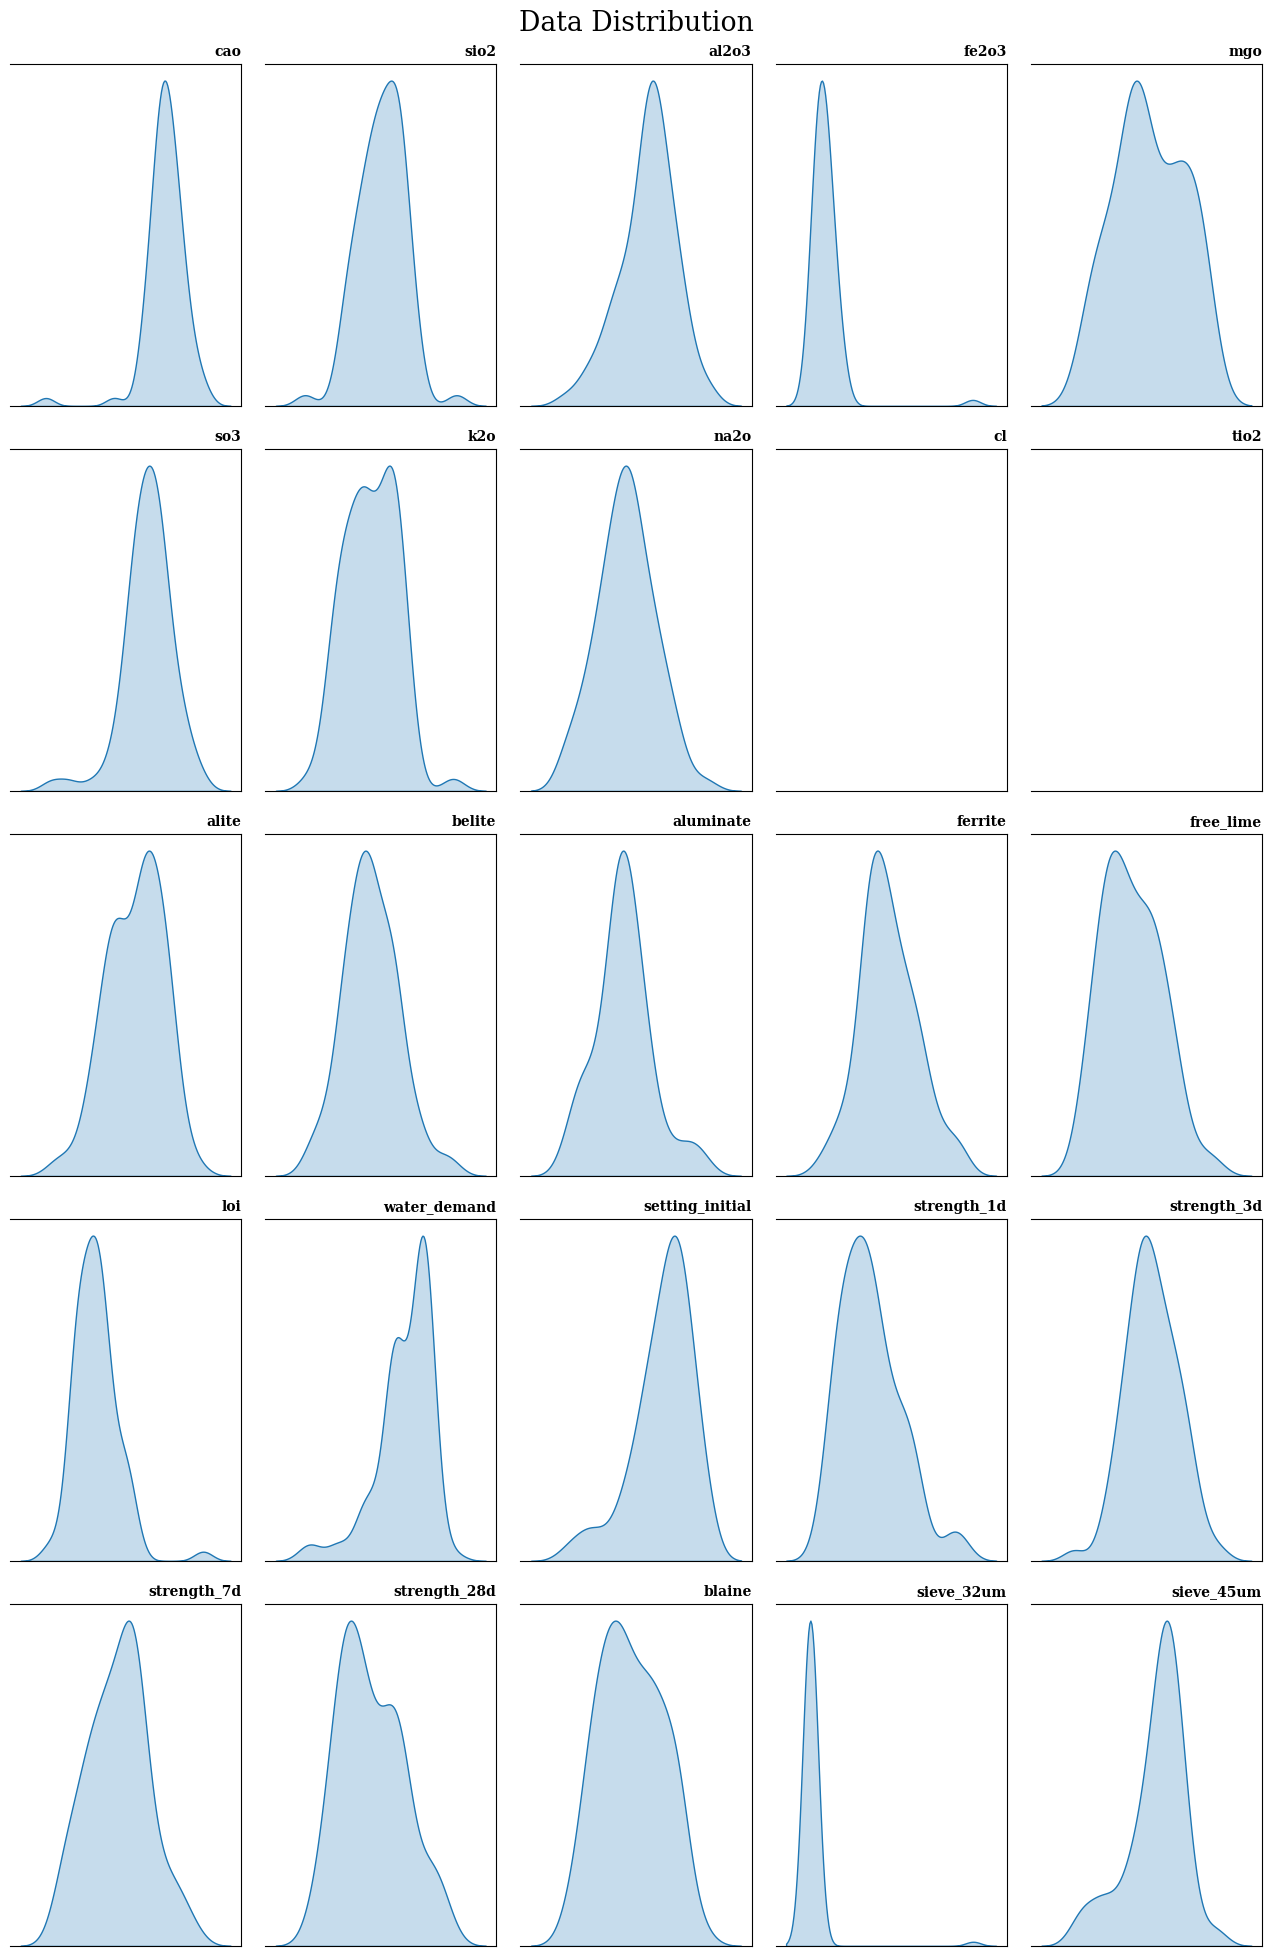

<IPython.core.display.Javascript object>

In [34]:
fig, axes = plt.subplots(5, 5, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

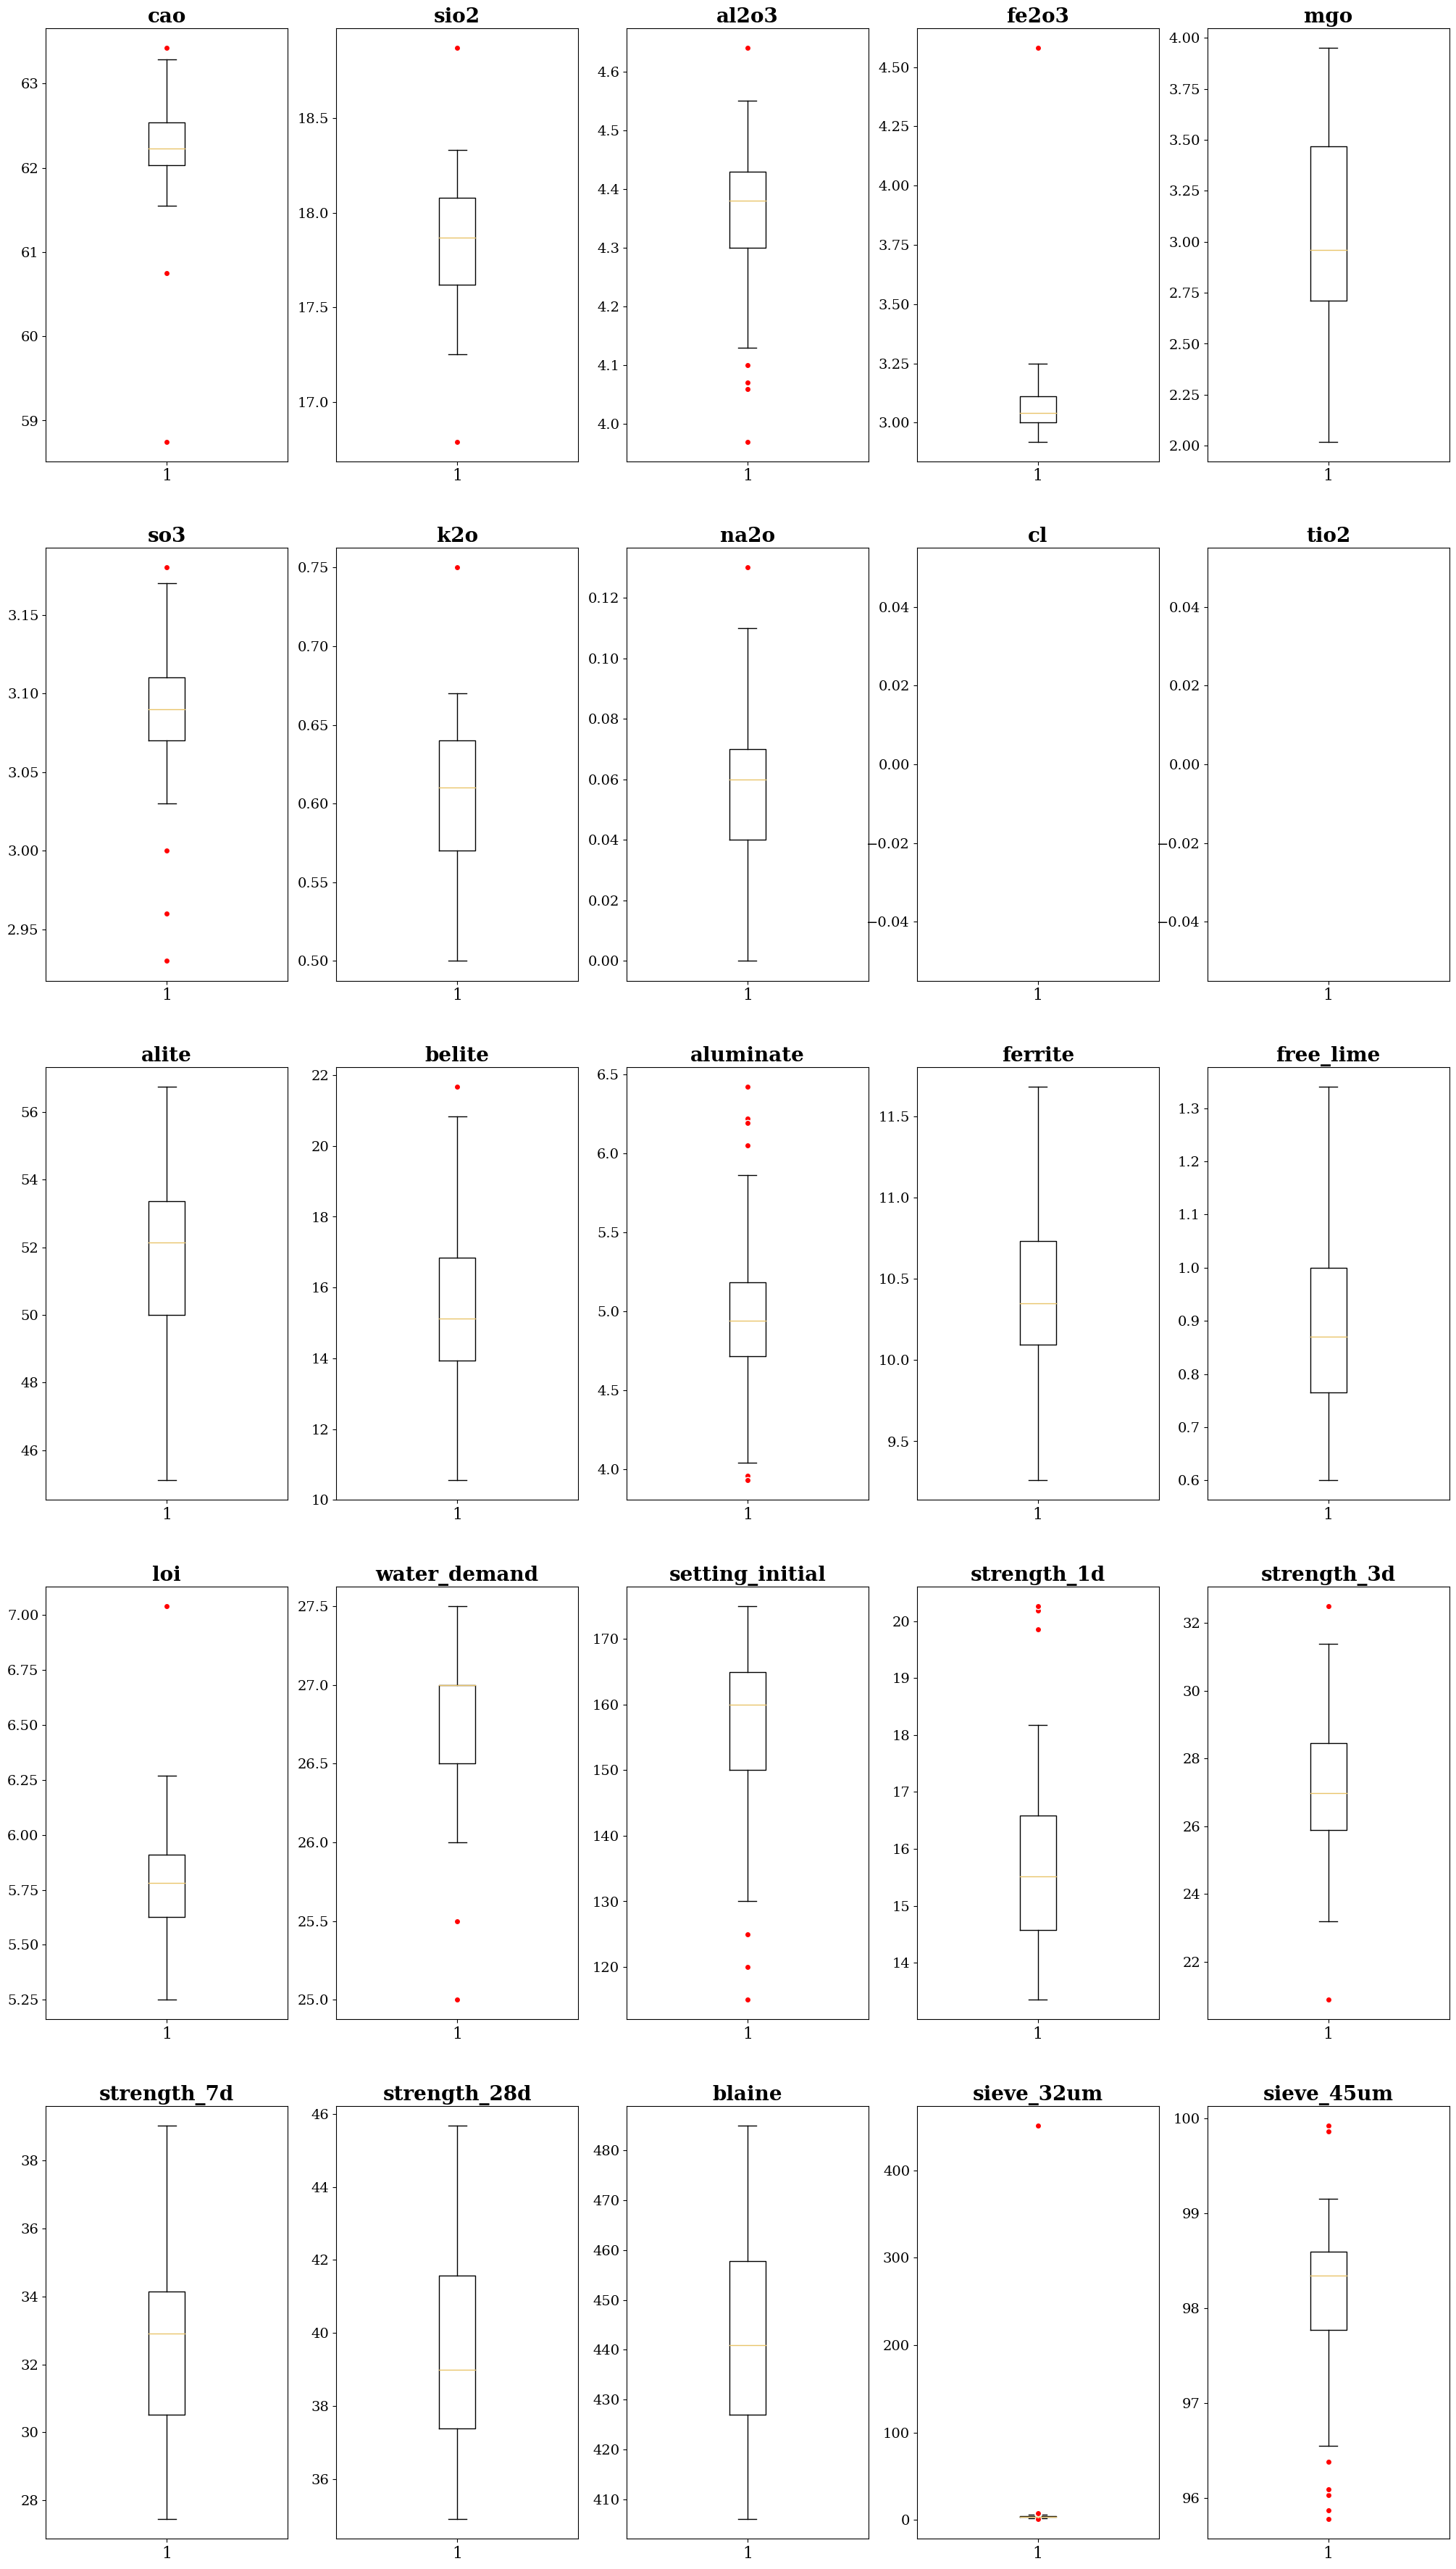

<IPython.core.display.Javascript object>

In [35]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(5, 5, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

<Axes: >

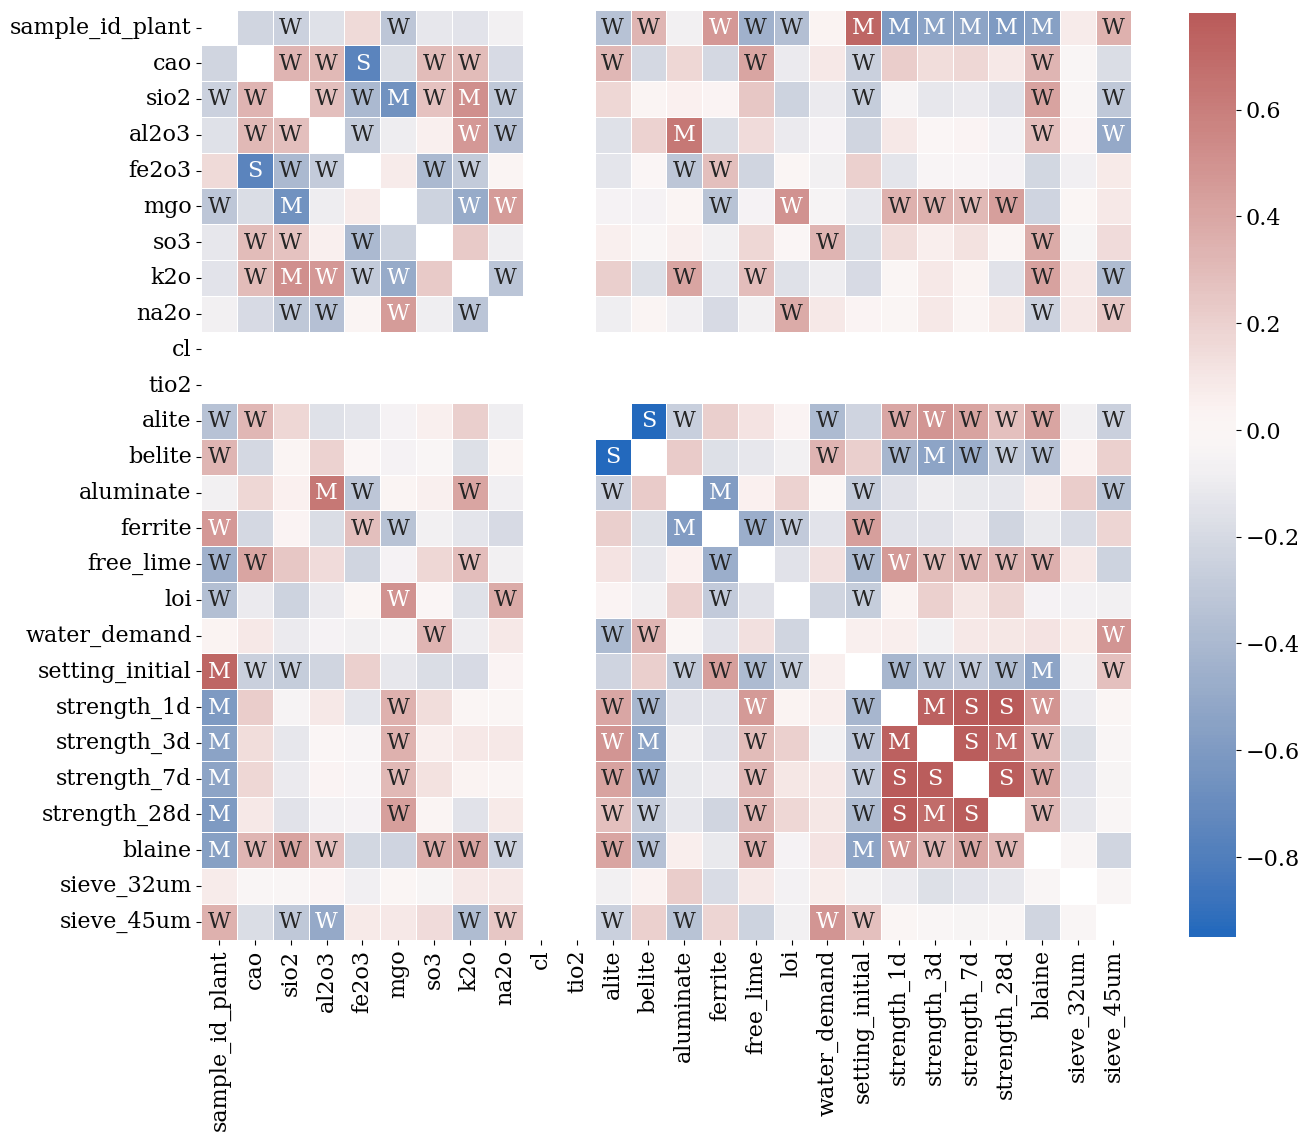

<IPython.core.display.Javascript object>

In [36]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

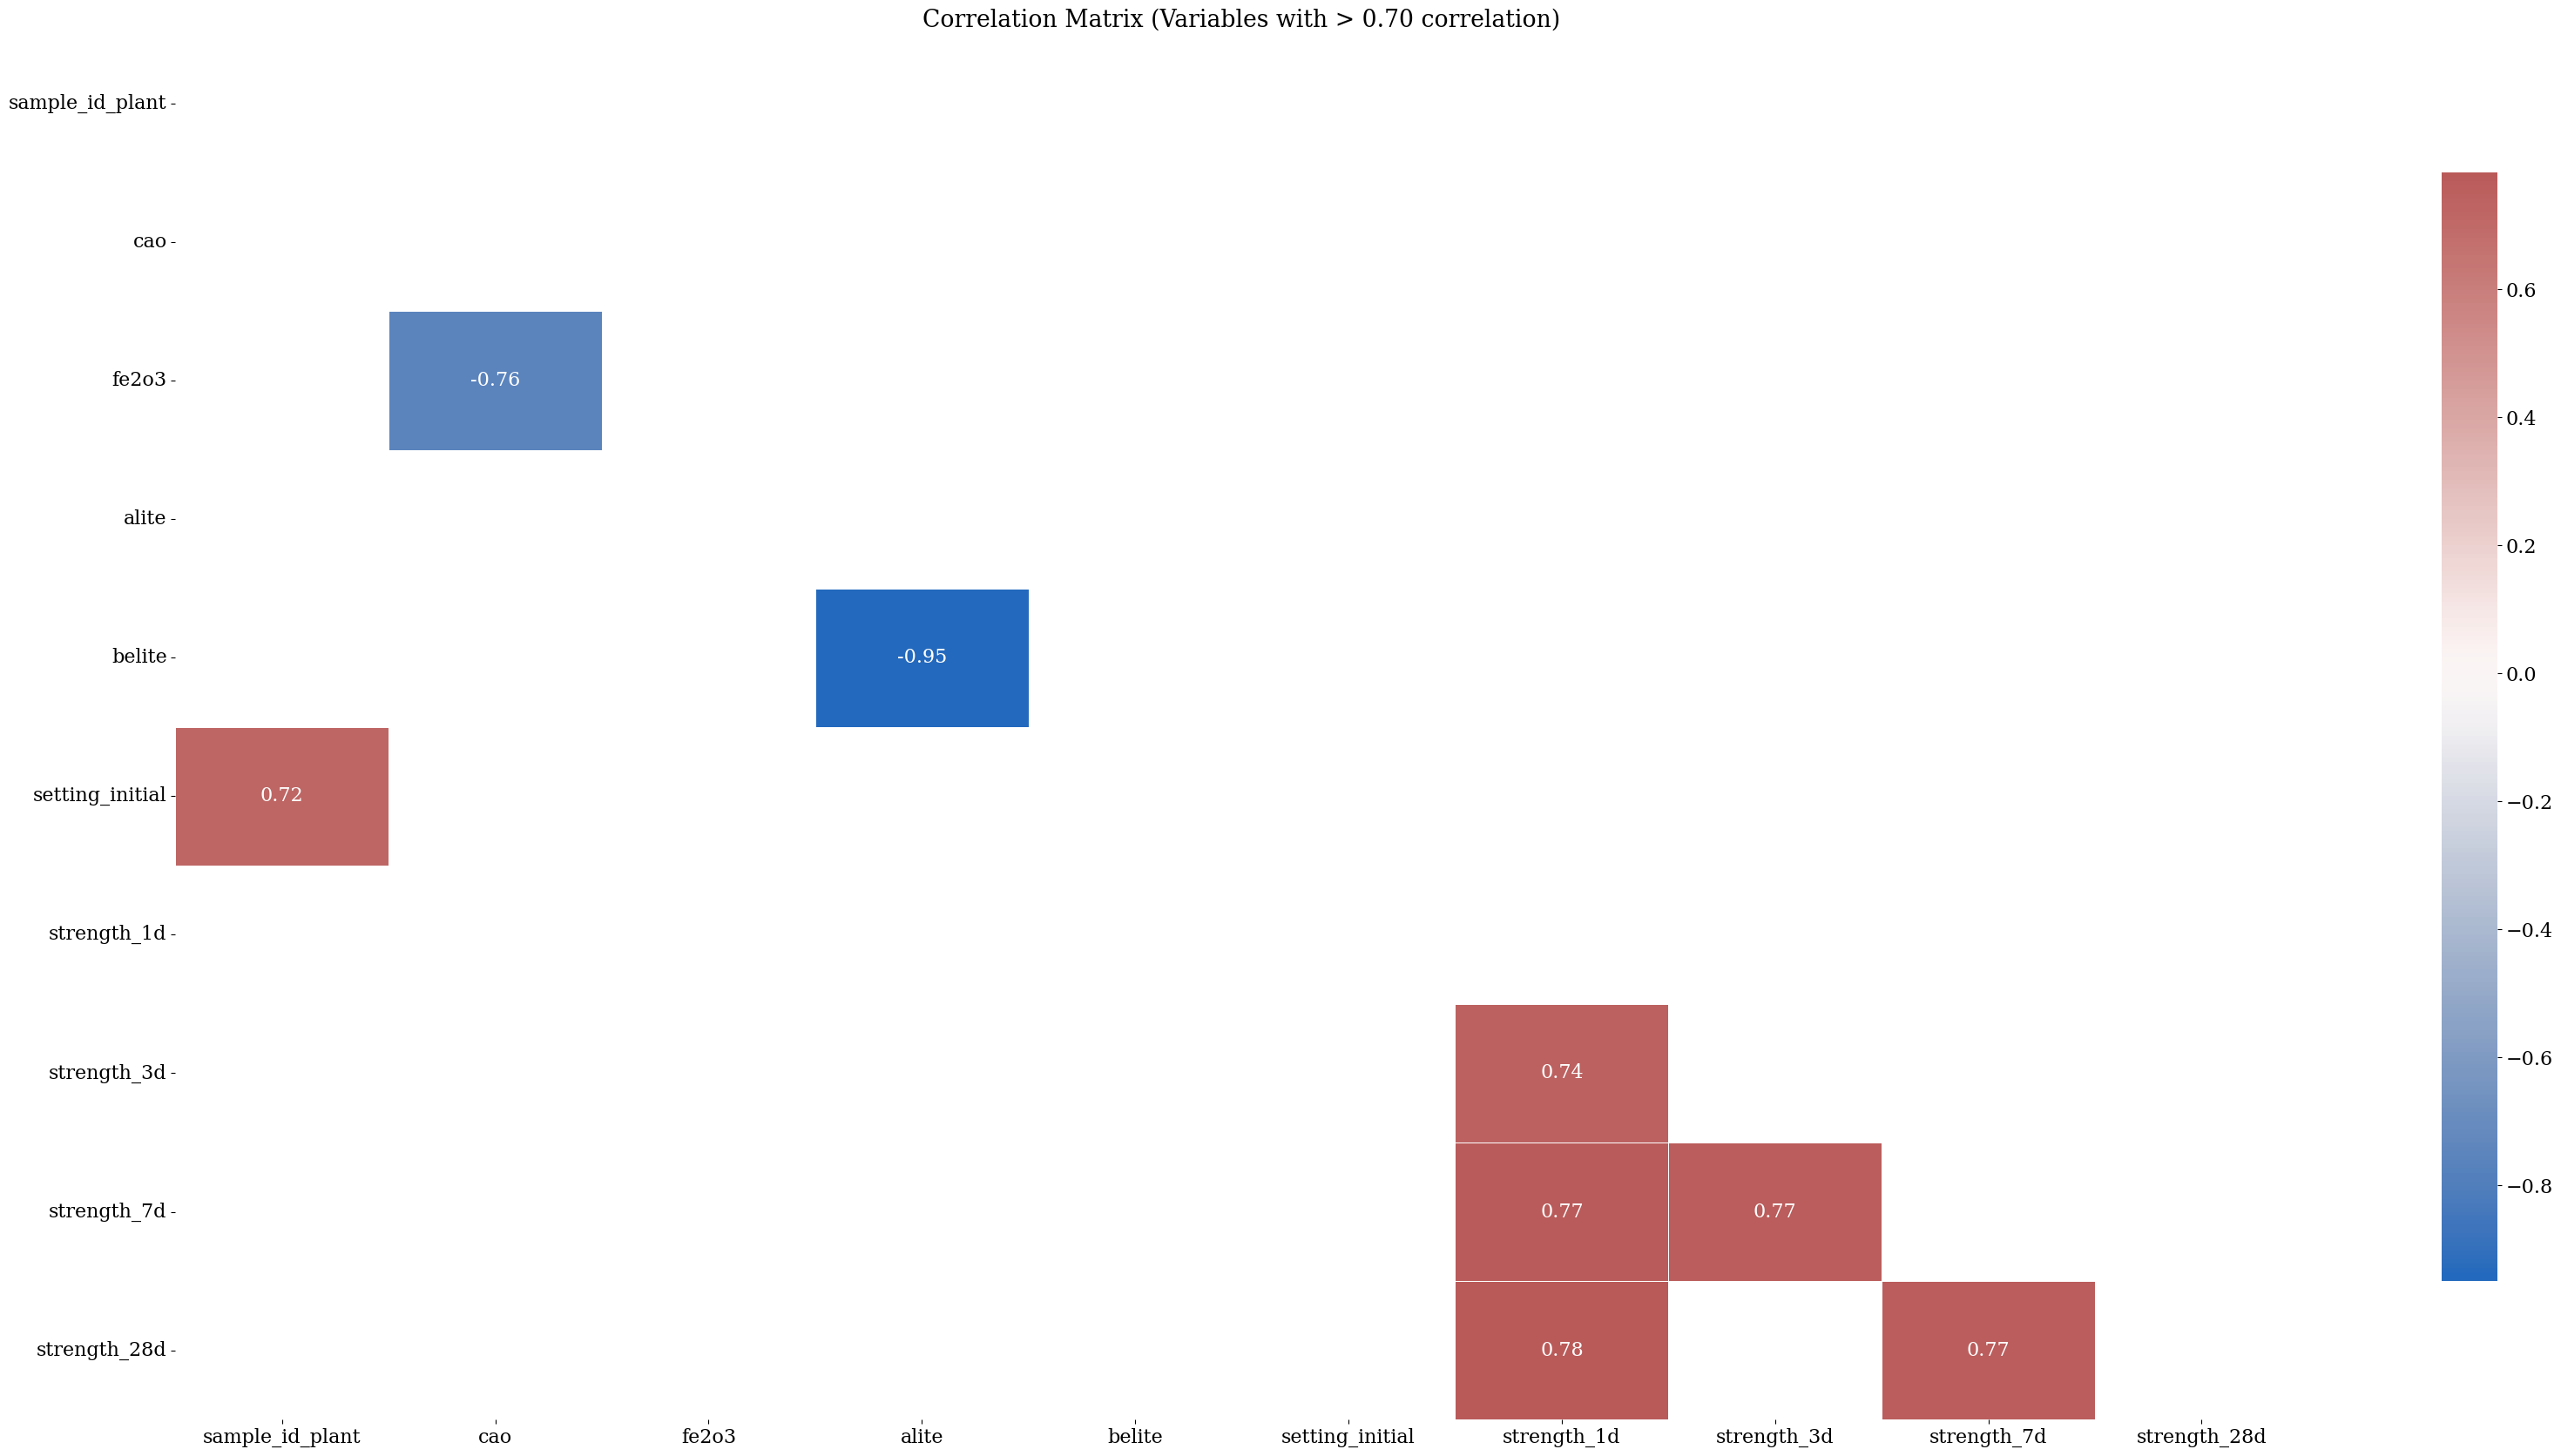

<IPython.core.display.Javascript object>

In [37]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [38]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

alite            belite             0.949633
strength_1d      strength_28d       0.781754
                 strength_7d        0.768240
strength_3d      strength_7d        0.767635
strength_7d      strength_28d       0.766170
cao              fe2o3              0.755348
strength_1d      strength_3d        0.741335
sample_id_plant  setting_initial    0.719257
dtype: float64

<IPython.core.display.Javascript object>

In [39]:
sol[sol.index.map(lambda x: "strength_28d" in x)]

strength_1d      strength_28d    0.781754
strength_7d      strength_28d    0.766170
strength_3d      strength_28d    0.689450
sample_id_plant  strength_28d    0.599025
mgo              strength_28d    0.440625
setting_initial  strength_28d    0.380966
free_lime        strength_28d    0.326043
strength_28d     blaine          0.323395
belite           strength_28d    0.282285
alite            strength_28d    0.278062
ferrite          strength_28d    0.223499
loi              strength_28d    0.167192
sio2             strength_28d    0.154264
k2o              strength_28d    0.150263
strength_28d     sieve_32um      0.122823
aluminate        strength_28d    0.120252
water_demand     strength_28d    0.103706
cao              strength_28d    0.091269
na2o             strength_28d    0.084143
al2o3            strength_28d    0.062933
fe2o3            strength_28d    0.054711
so3              strength_28d    0.023997
strength_28d     sieve_45um      0.023418
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

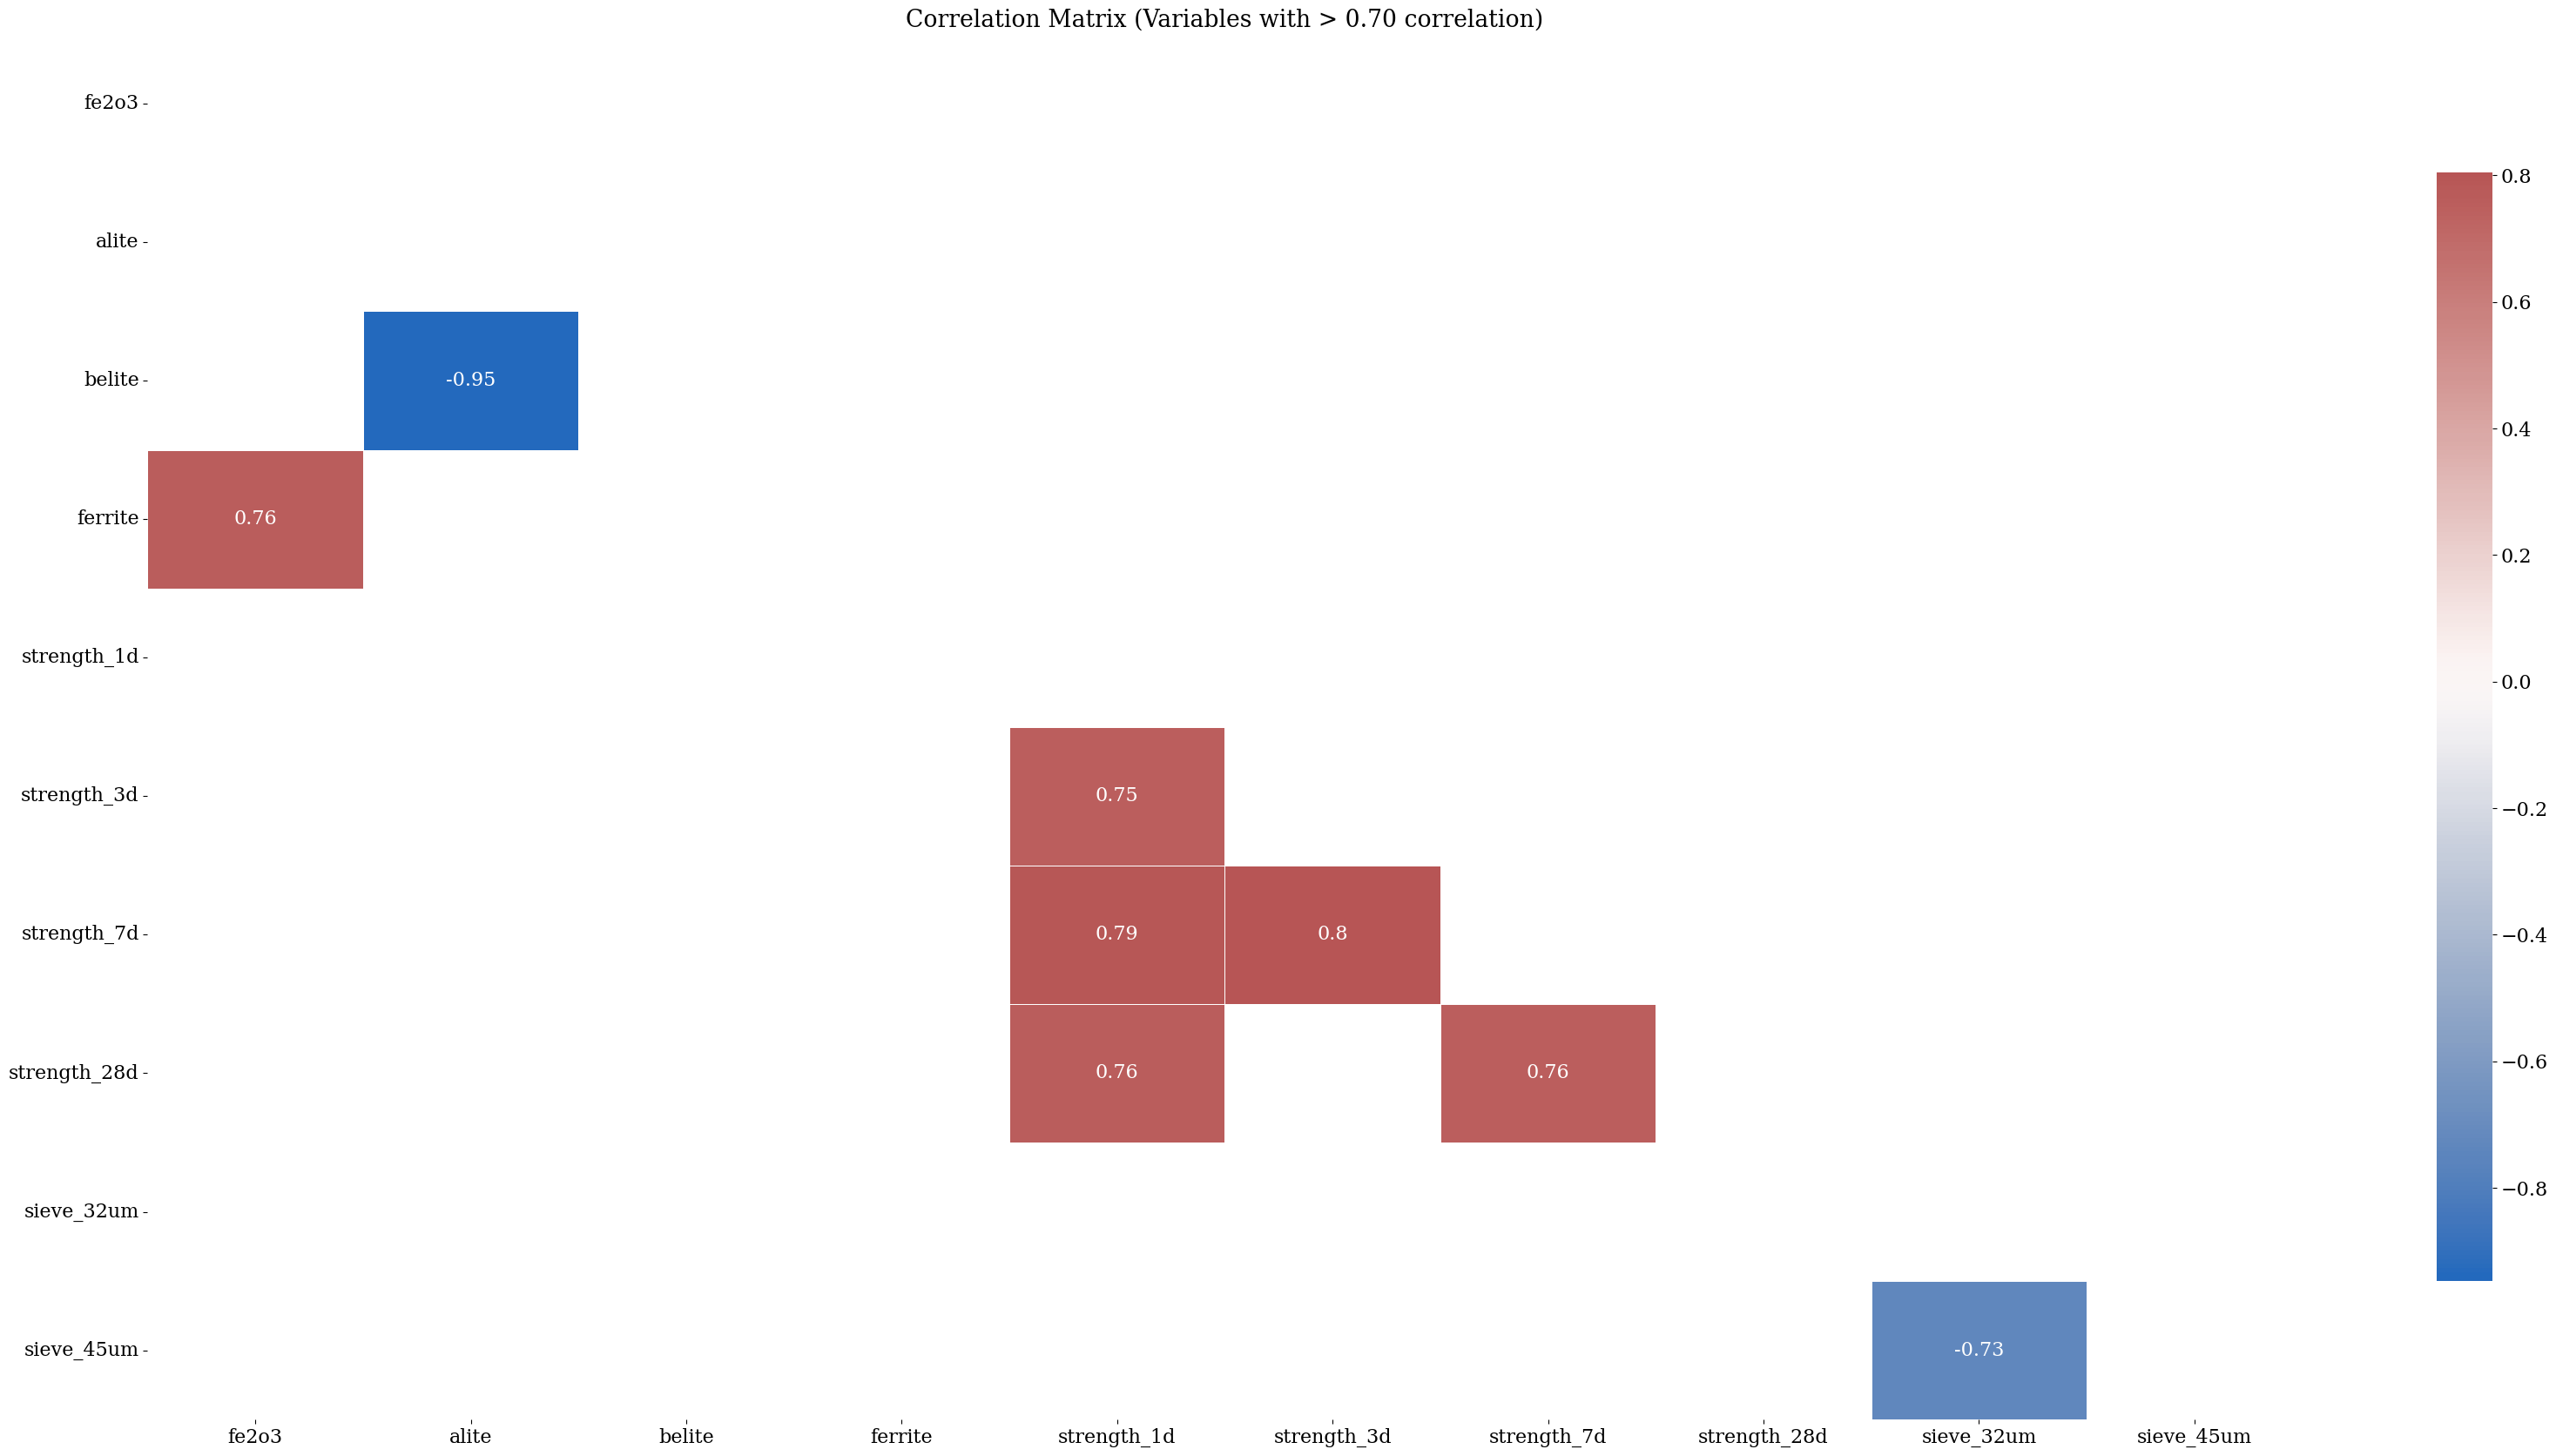

<IPython.core.display.Javascript object>

In [40]:
df_corr = df.select_dtypes(exclude=object).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [41]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="spearman").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

alite        belite          0.947059
strength_3d  strength_7d     0.804004
strength_1d  strength_7d     0.794463
fe2o3        ferrite         0.758399
strength_1d  strength_28d    0.756956
strength_7d  strength_28d    0.755952
strength_1d  strength_3d     0.752444
sieve_32um   sieve_45um      0.732568
dtype: float64

<IPython.core.display.Javascript object>

In [42]:
sol[sol.index.map(lambda x: "strength_28d" in x)]

strength_1d      strength_28d    0.756956
strength_7d      strength_28d    0.755952
sample_id_plant  strength_28d    0.691697
strength_3d      strength_28d    0.690760
mgo              strength_28d    0.472333
setting_initial  strength_28d    0.439454
strength_28d     blaine          0.334683
free_lime        strength_28d    0.307156
loi              strength_28d    0.263795
fe2o3            strength_28d    0.255291
ferrite          strength_28d    0.248426
belite           strength_28d    0.232787
cao              strength_28d    0.216323
alite            strength_28d    0.214341
sio2             strength_28d    0.179568
strength_28d     sieve_32um      0.178853
k2o              strength_28d    0.172475
na2o             strength_28d    0.096059
aluminate        strength_28d    0.055071
so3              strength_28d    0.015008
al2o3            strength_28d    0.010642
water_demand     strength_28d    0.004963
strength_28d     sieve_45um      0.000430
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

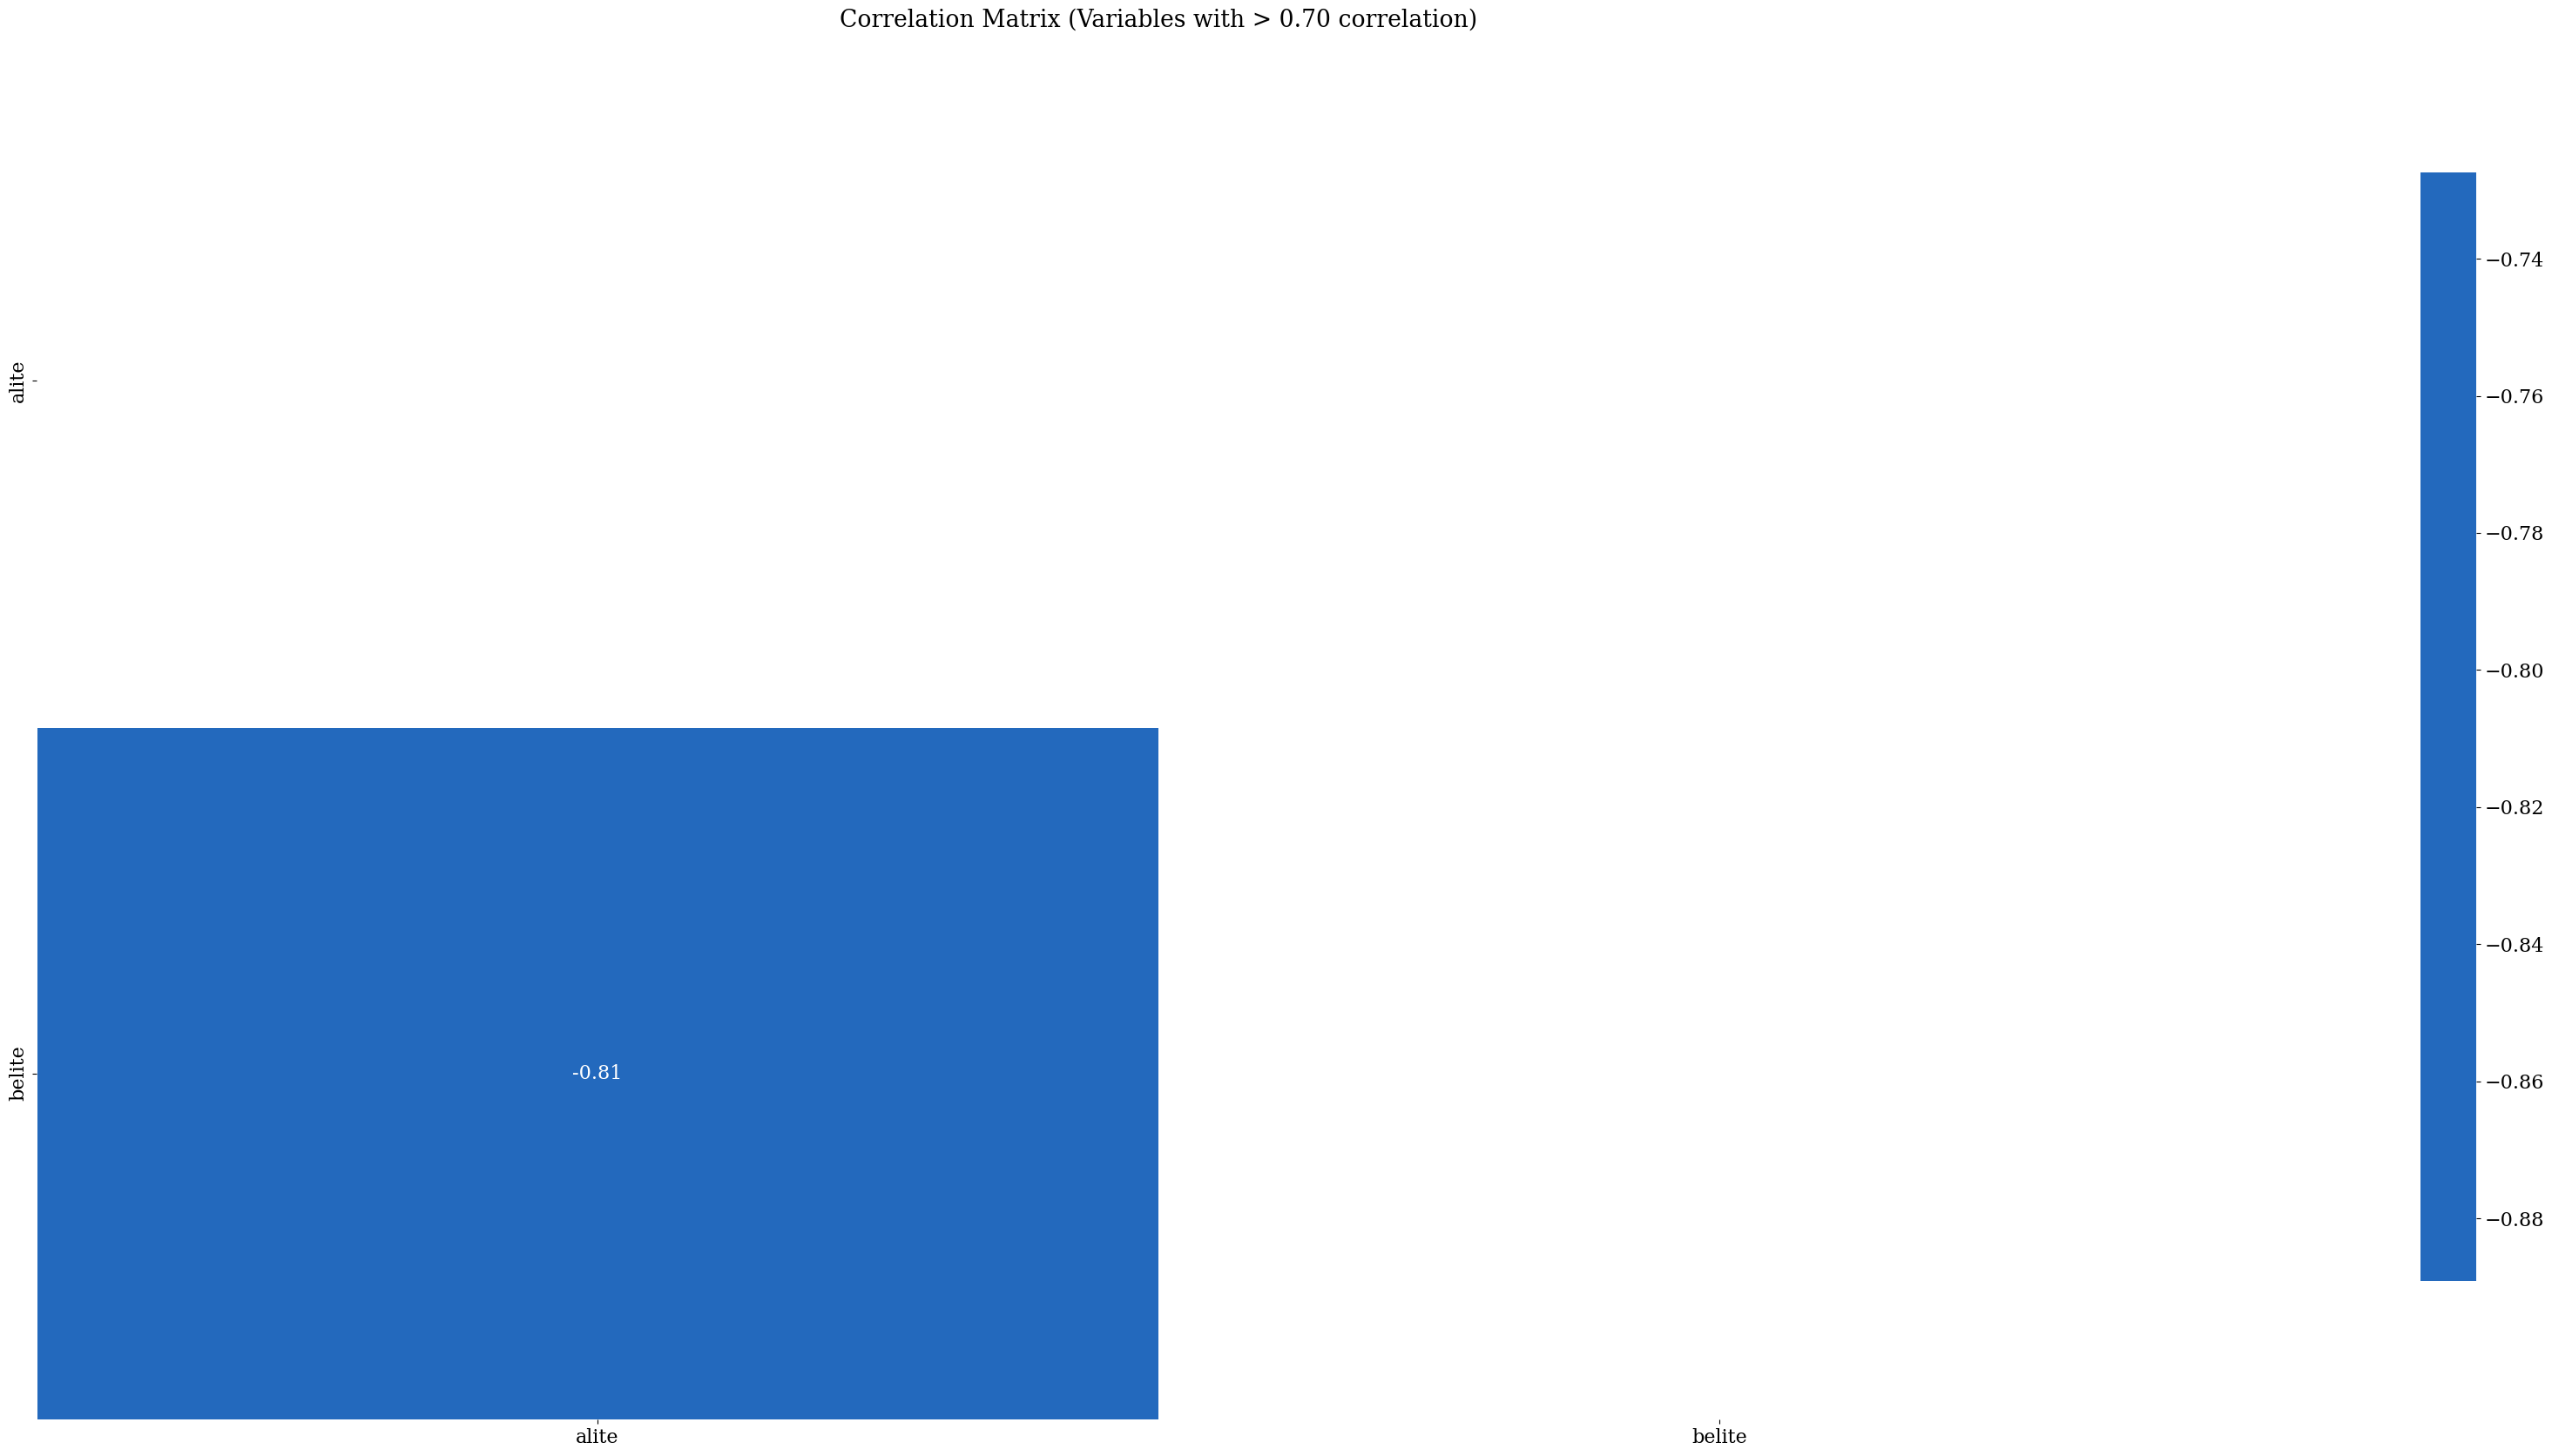

<IPython.core.display.Javascript object>

In [43]:
df_corr = df.select_dtypes(exclude=object).corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [44]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="kendall").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

alite  belite    0.808303
dtype: float64

<IPython.core.display.Javascript object>

In [45]:
sol[sol.index.map(lambda x: "strength_28d" in x)]

strength_1d      strength_28d    0.563376
strength_7d      strength_28d    0.557240
strength_3d      strength_28d    0.505000
sample_id_plant  strength_28d    0.486676
setting_initial  strength_28d    0.320294
mgo              strength_28d    0.306480
strength_28d     blaine          0.225794
free_lime        strength_28d    0.198226
loi              strength_28d    0.182158
fe2o3            strength_28d    0.164400
ferrite          strength_28d    0.163656
belite           strength_28d    0.159870
alite            strength_28d    0.146825
cao              strength_28d    0.143029
k2o              strength_28d    0.124269
strength_28d     sieve_32um      0.123436
sio2             strength_28d    0.118902
na2o             strength_28d    0.063094
aluminate        strength_28d    0.039393
al2o3            strength_28d    0.010030
water_demand     strength_28d    0.008853
so3              strength_28d    0.006401
strength_28d     sieve_45um      0.004678
dtype: float64

<IPython.core.display.Javascript object>

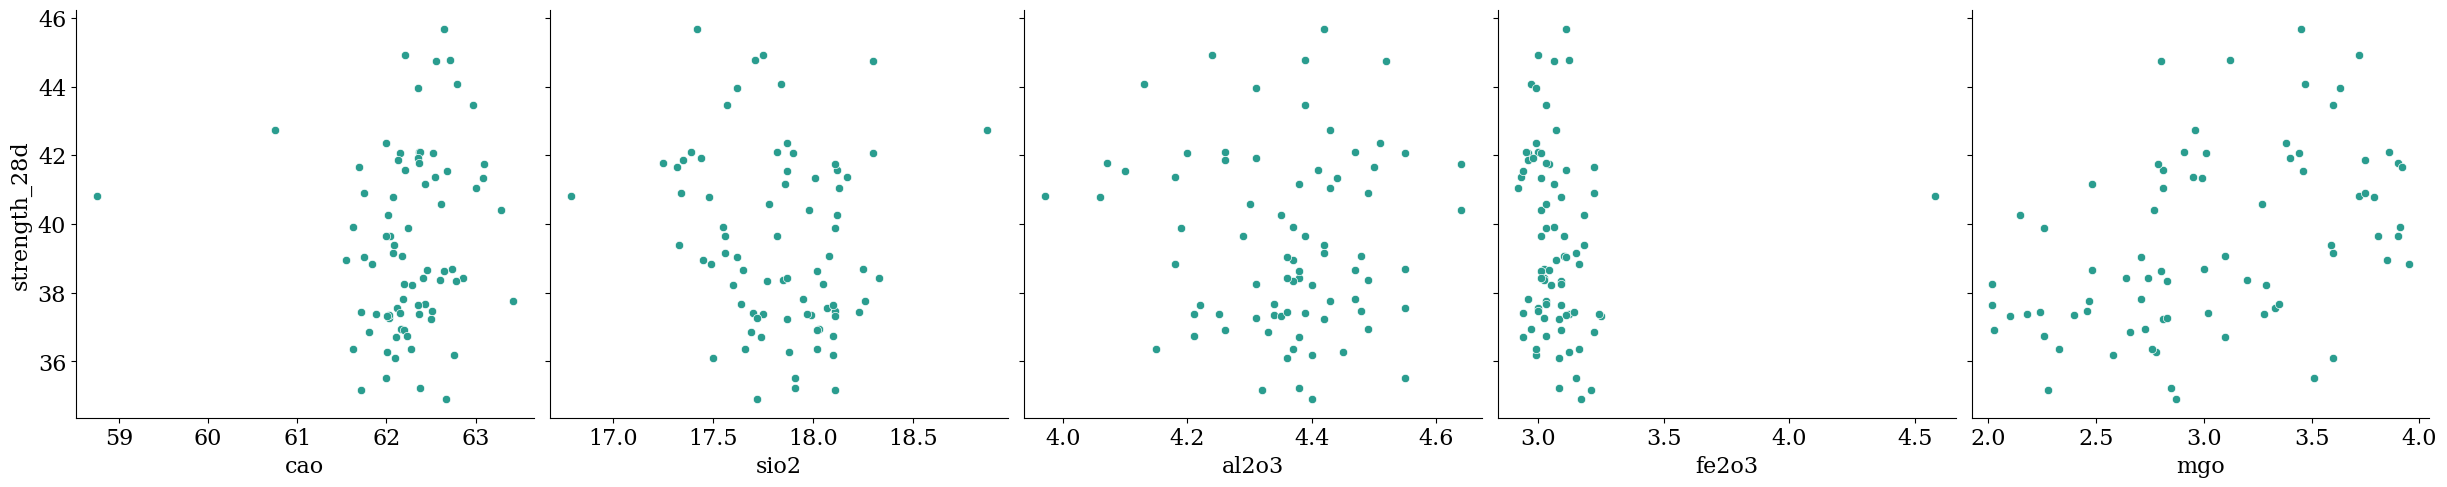

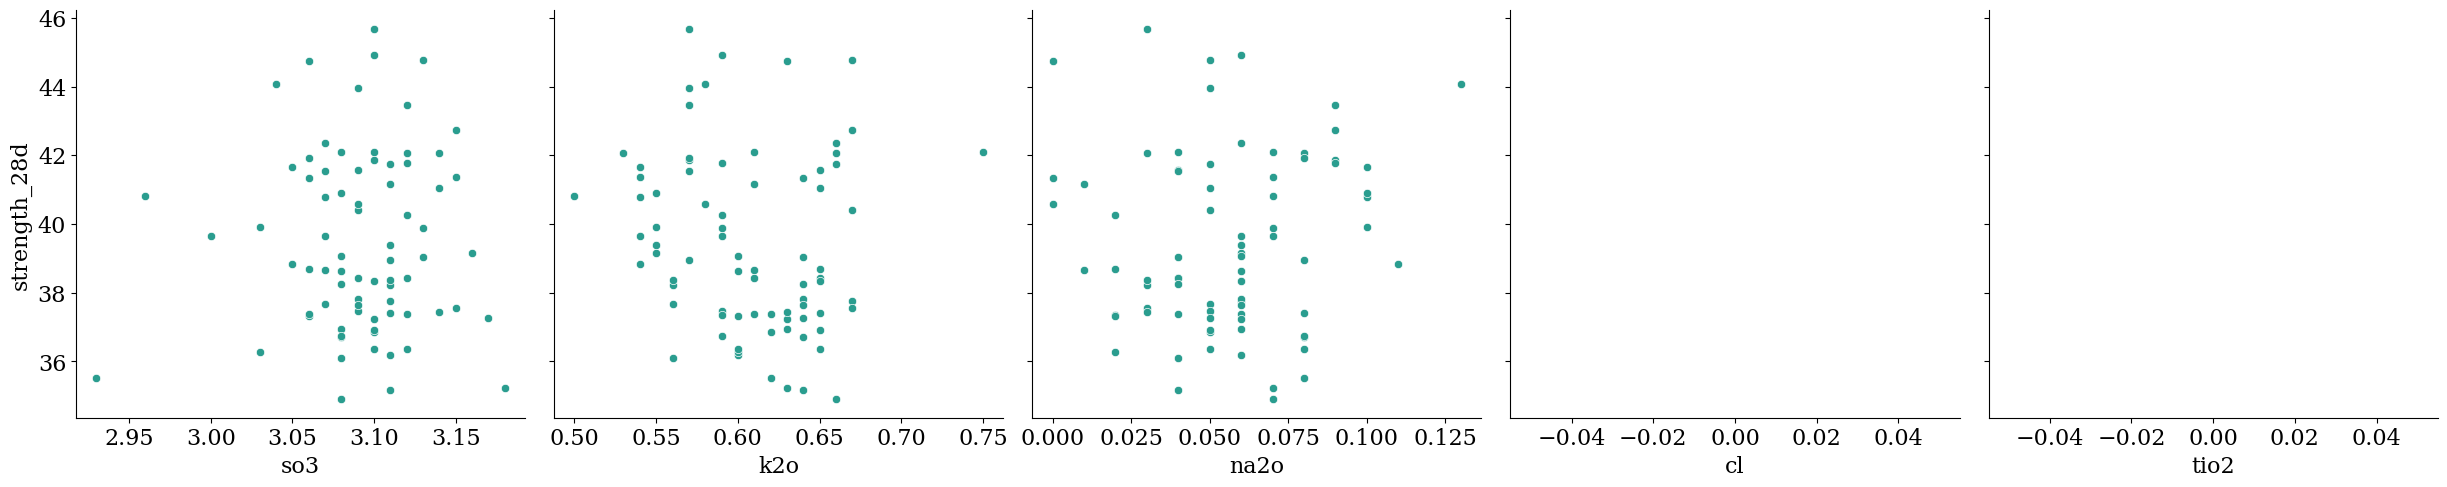

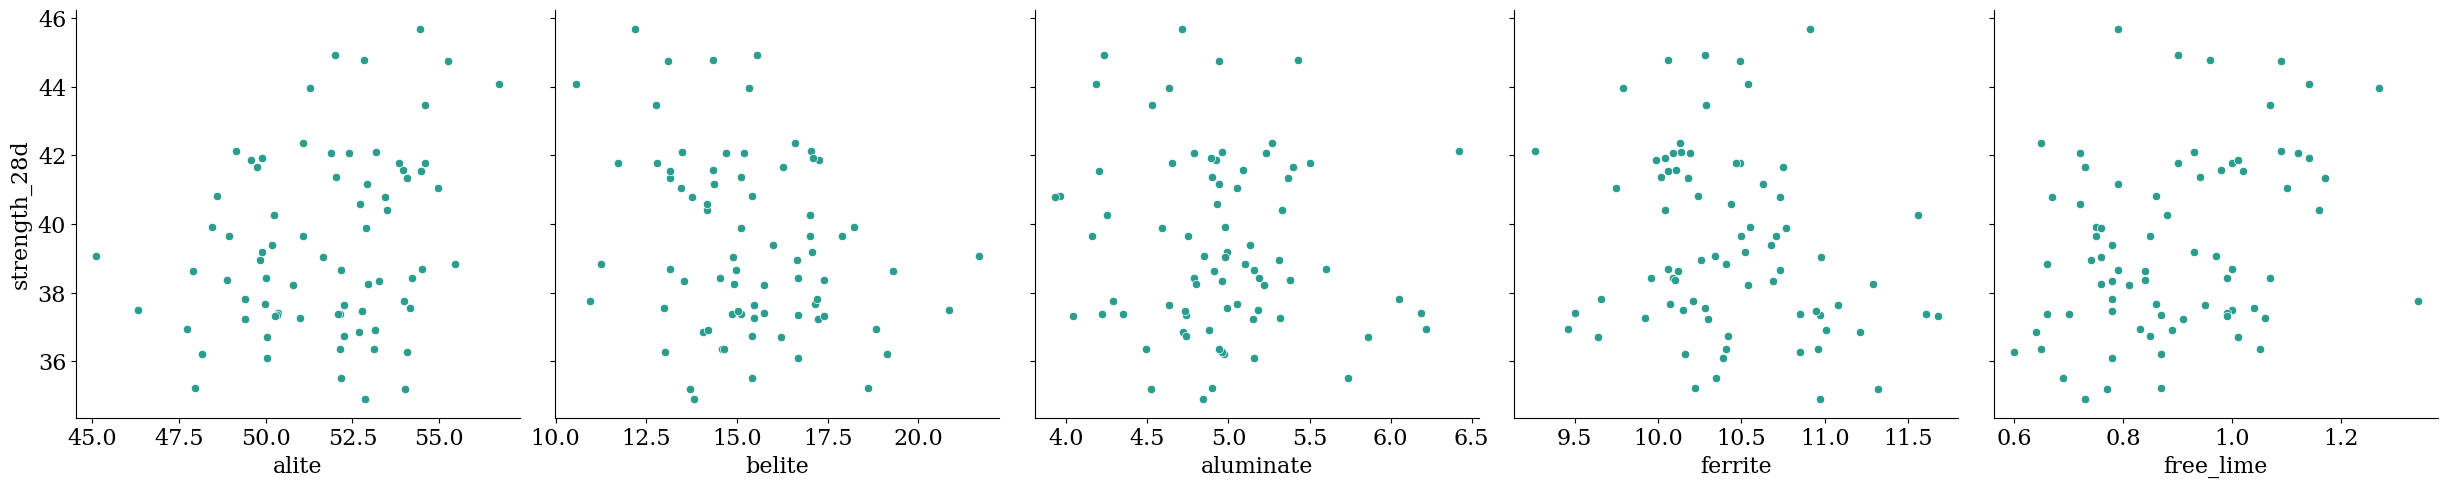

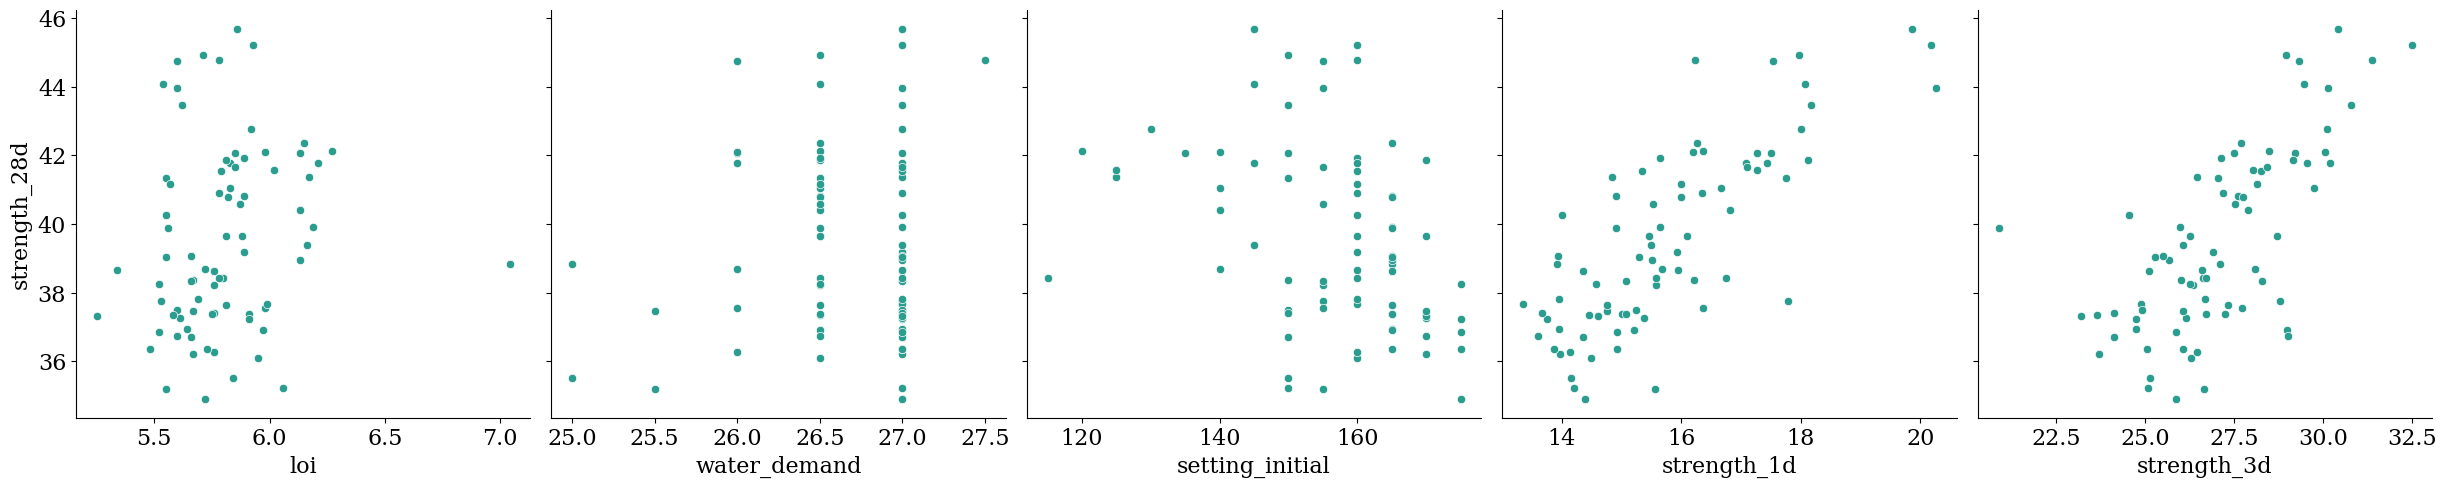

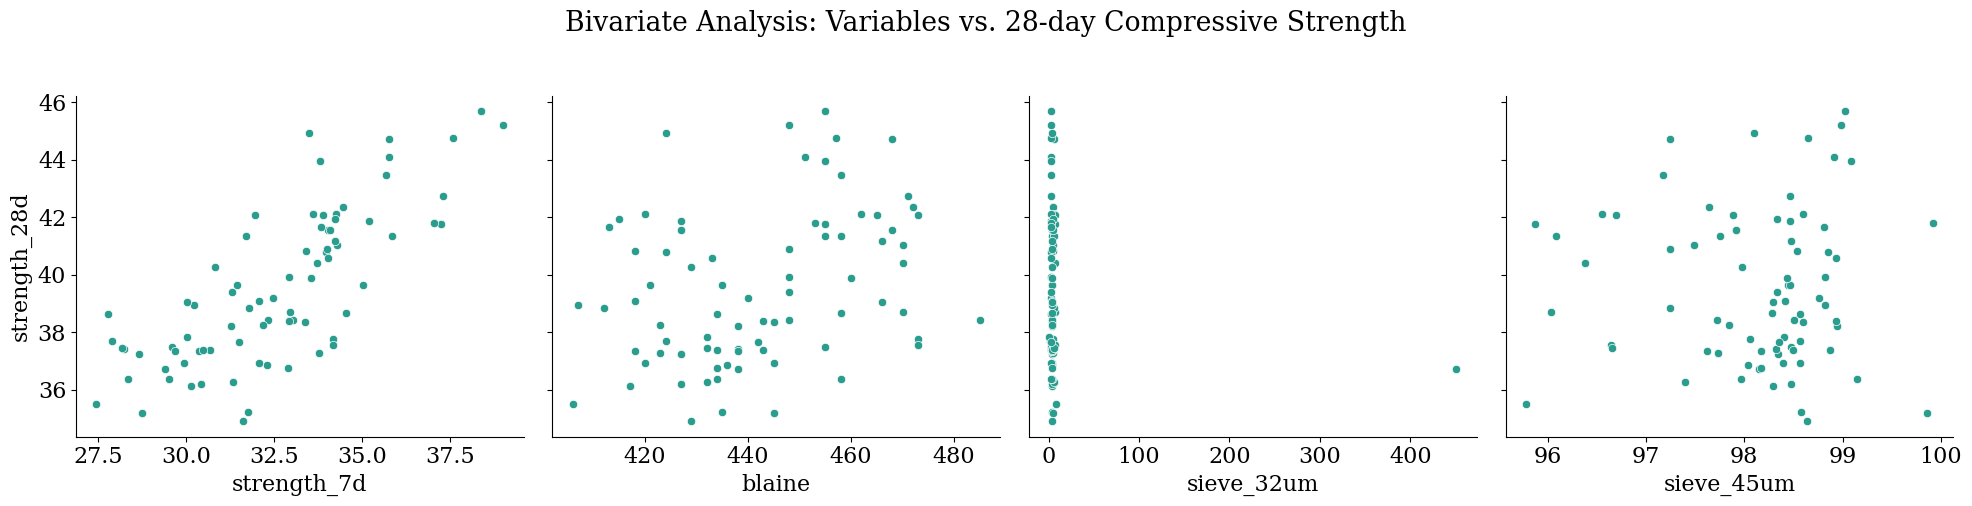

<IPython.core.display.Javascript object>

In [46]:
num_lines = 5
plots_per_line = 5

variables_to_plot = df[df.columns[4:]].select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("strength_28d")


for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        data=df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["strength_28d"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

grid.fig.suptitle(
    "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
)
plt.tight_layout()
plt.show()

In [47]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

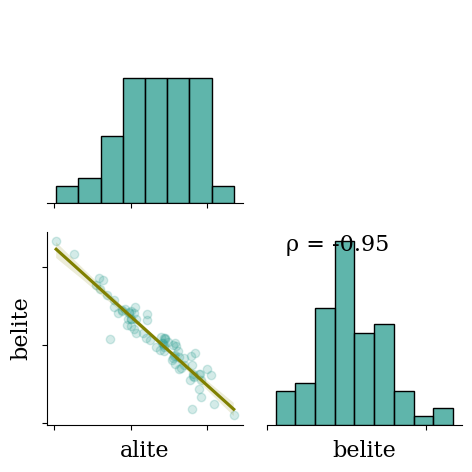

<IPython.core.display.Javascript object>

In [48]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Data/Hora Variable Analyses

In [49]:
dates

0     2020-05-11 10:00:00+00:00
1     2020-05-11 10:00:00+00:00
2     2020-07-03 10:00:00+00:00
3     2020-08-21 10:00:00+00:00
4     2020-09-11 10:00:00+00:00
                ...            
73    2021-12-22 11:00:00+00:00
74    2021-12-23 11:00:00+00:00
75    2021-12-29 11:00:00+00:00
76    2021-12-30 11:00:00+00:00
77    2021-12-31 11:00:00+00:00
Name: sample_date, Length: 78, dtype: object

<IPython.core.display.Javascript object>

In [50]:
dates = pd.to_datetime(dates)

<IPython.core.display.Javascript object>

In [51]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

56 valid days out of 77


<IPython.core.display.Javascript object>

In [52]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021}


<IPython.core.display.Javascript object>

In [53]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {5, 7, 8, 9, 10, 11, 12}, 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}

<IPython.core.display.Javascript object>

In [54]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  5         1
      7         1
      8         1
      9         2
      10        2
      11        2
      12        3
2021  1         3
      2         1
      3         1
      4         3
      5         5
      6         4
      7         3
      8         8
      9         8
      10       10
      11        4
      12       15
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

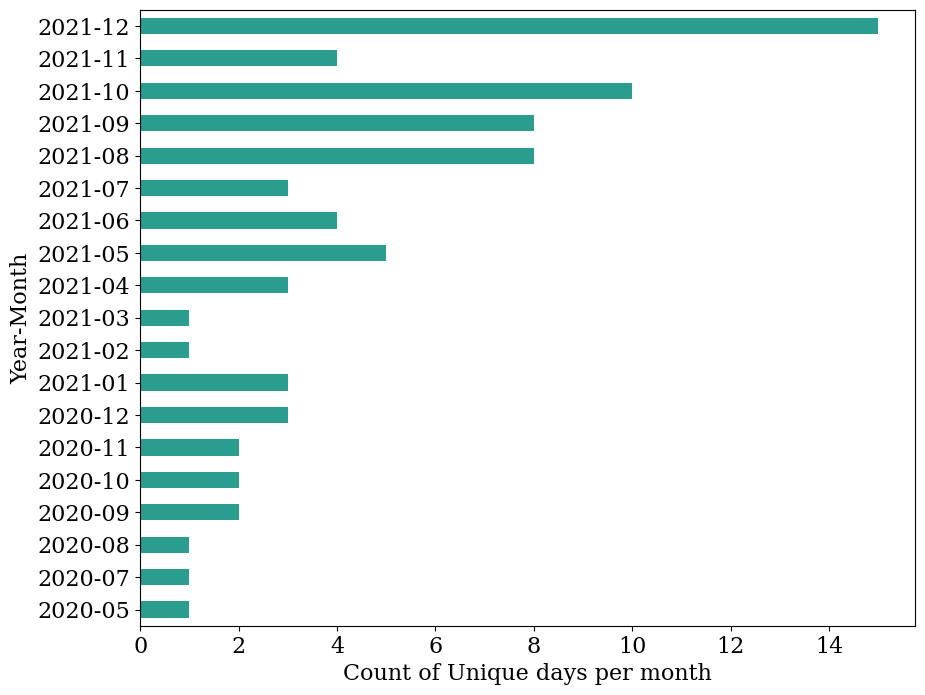

<IPython.core.display.Javascript object>

In [55]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [56]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  5         2
      7         1
      8         1
      9         2
      10        2
      11        2
      12        3
2021  1         3
      2         1
      3         1
      4         3
      5         5
      6         4
      7         3
      8         8
      9         8
      10       10
      11        4
      12       15
Name: size, dtype: int64


<IPython.core.display.Javascript object>

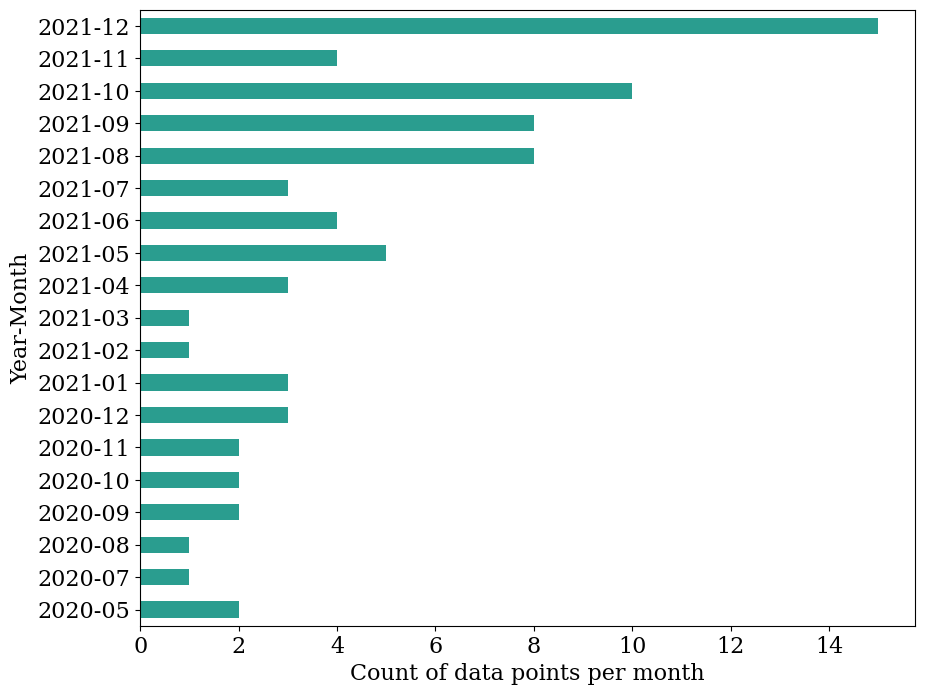

<IPython.core.display.Javascript object>

In [57]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [58]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2020-7 has the minimum number of days with samples - 1
2021-12 has the maximum number of days with samples - 15


<IPython.core.display.Javascript object>

In [59]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

,DayCount
count,77.000000
mean,1.012987
std,0.113961
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


<IPython.core.display.Javascript object>

In [60]:
day_counts[["DayCount"]].value_counts()

DayCount
1           76
2            1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [61]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

,Year,Month,Day,DayCount
0,2020,5,11,2


<IPython.core.display.Javascript object>

In [62]:
df_copy = df.copy()
df_copy["sample_date"] = pd.to_datetime(df_copy["sample_date"])
df_copy["Year"] = df_copy["sample_date"].dt.year
df_copy["Month"] = df_copy["sample_date"].dt.month
df_copy["Day"] = df_copy["sample_date"].dt.day

df_merge = df_copy.merge(right=day_counts, how="left", on=["Year", "Month", "Day"])

uniques = df_merge["DayCount"].unique()
uniques.sort()

for daycount in uniques:
    nulls = df_merge[df_merge["DayCount"] == daycount]["strength_28d"].isna().sum()
    print(daycount, nulls)

1 0
2 0


<IPython.core.display.Javascript object>

In [63]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i - 1])
# diffs

<IPython.core.display.Javascript object>

In [64]:
# Average Frequency
np.mean(diffs)

Timedelta('7 days 18:42:51.428571428')

<IPython.core.display.Javascript object>

In [65]:
Counter(diffs)

Counter({Timedelta('1 days 00:00:00'): 17,
         Timedelta('6 days 00:00:00'): 10,
         Timedelta('2 days 00:00:00'): 8,
         Timedelta('7 days 00:00:00'): 7,
         Timedelta('5 days 00:00:00'): 6,
         Timedelta('14 days 00:00:00'): 5,
         Timedelta('8 days 00:00:00'): 5,
         Timedelta('15 days 00:00:00'): 3,
         Timedelta('4 days 00:00:00'): 3,
         Timedelta('21 days 00:00:00'): 2,
         Timedelta('14 days 01:00:00'): 2,
         Timedelta('20 days 00:00:00'): 2,
         Timedelta('0 days 00:00:00'): 1,
         Timedelta('53 days 00:00:00'): 1,
         Timedelta('49 days 00:00:00'): 1,
         Timedelta('25 days 23:00:00'): 1,
         Timedelta('9 days 00:00:00'): 1,
         Timedelta('10 days 00:00:00'): 1,
         Timedelta('3 days 00:00:00'): 1})

<IPython.core.display.Javascript object>

<Axes: xlabel='count'>

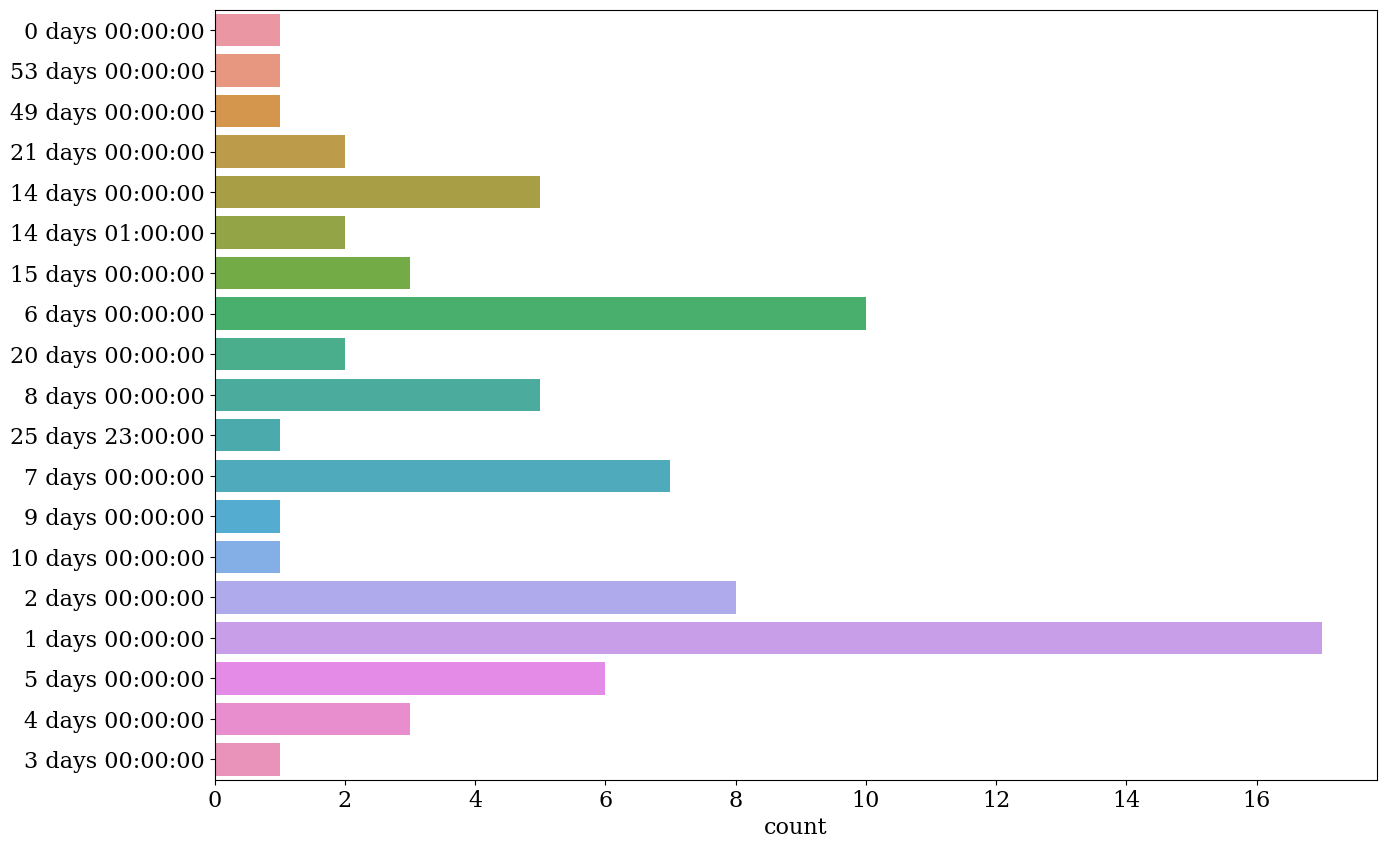

<IPython.core.display.Javascript object>

In [66]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [67]:
# percent of diffs
[round(val / df.shape[0] * 100, 2) for val in list(Counter(diffs).values())]

[1.28,
 1.28,
 1.28,
 2.56,
 6.41,
 2.56,
 3.85,
 12.82,
 2.56,
 6.41,
 1.28,
 8.97,
 1.28,
 1.28,
 10.26,
 21.79,
 7.69,
 3.85,
 1.28]

<IPython.core.display.Javascript object>

In [68]:
df["sample_date"] = pd.to_datetime(df["sample_date"])

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Days

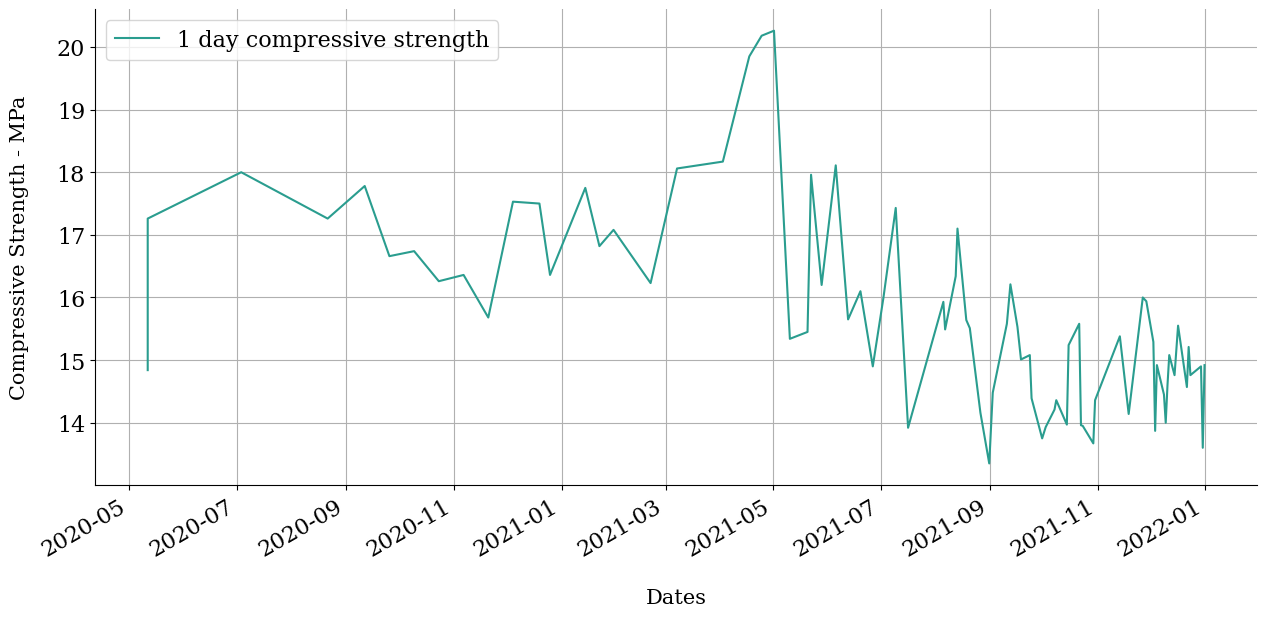

<IPython.core.display.Javascript object>

In [69]:
tmp = df[["sample_date", "strength_1d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 3 Days

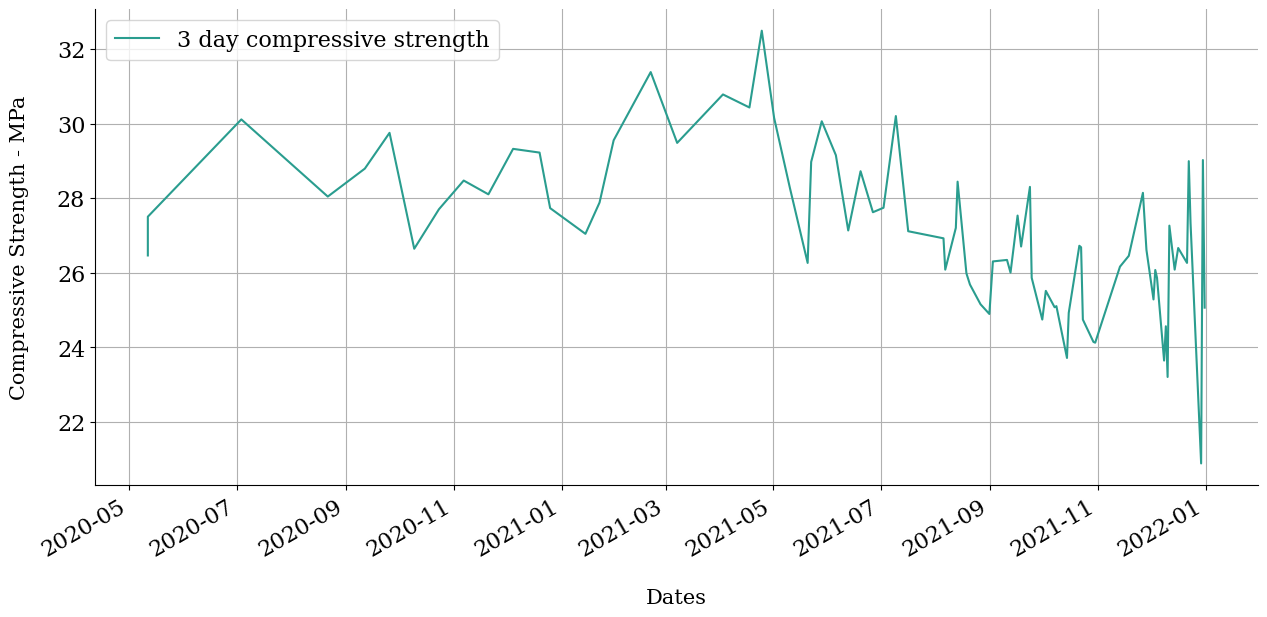

<IPython.core.display.Javascript object>

In [70]:
tmp = df[["sample_date", "strength_3d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 7 Days

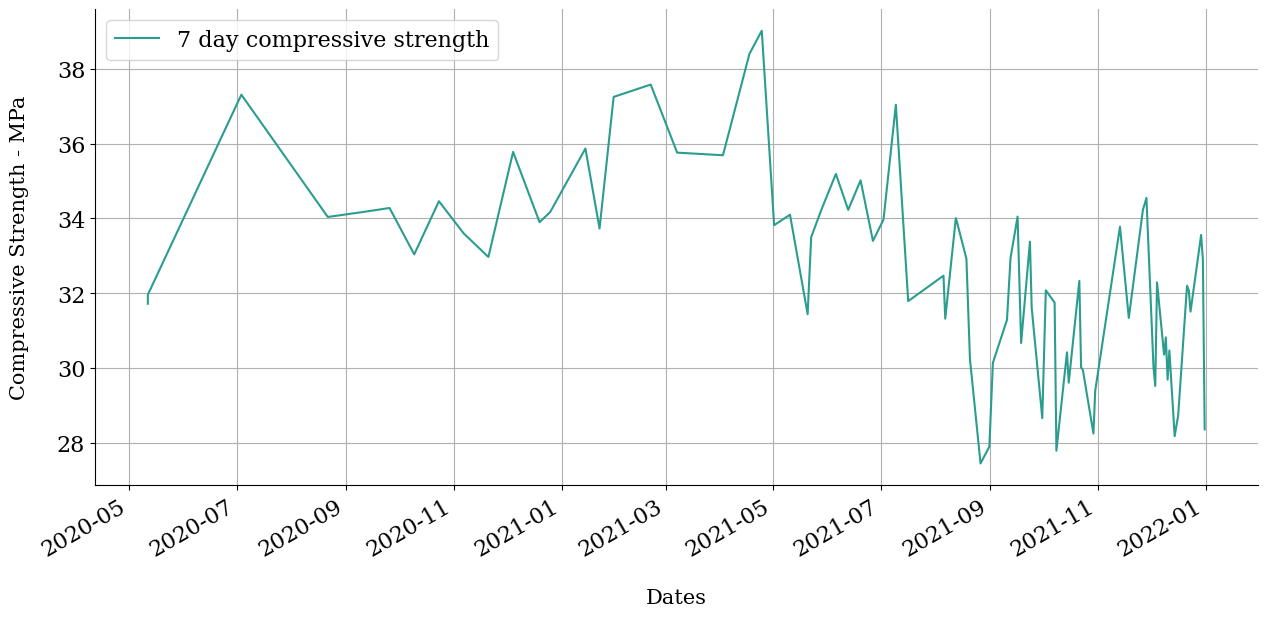

<IPython.core.display.Javascript object>

In [71]:
tmp = df[["sample_date", "strength_7d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 28 Days

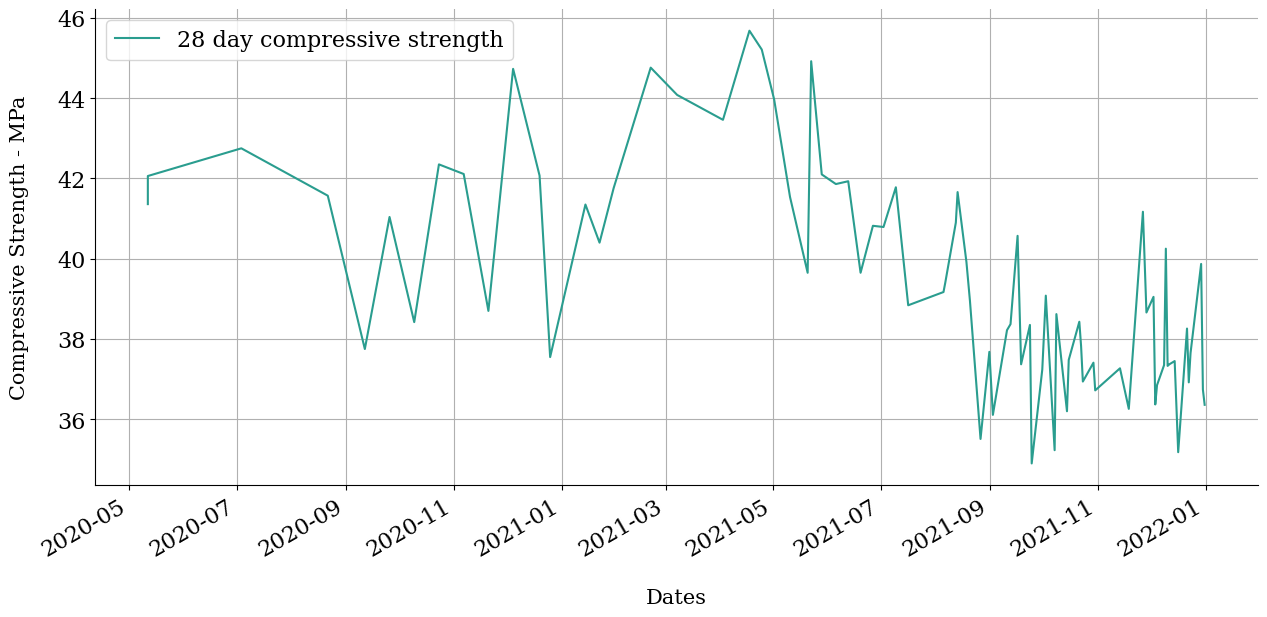

<IPython.core.display.Javascript object>

In [72]:
tmp = df[["sample_date", "strength_28d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()